# **Who Had Access to the Internet During the Shutdown?**
### Data analysis of +50,000 posts published in 48 active and highly-followed news channels inside Iran between January 3 and January 21, 2026.

In [ ]:
%pip install matplotlib seaborn
%pip install emoji

### **0 - Install and import libraries and read data**

In [63]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# reading data
tg = pd.read_csv("fctgposts.csv")

# handling the time
tg["date_hr"] = pd.to_datetime(tg["date_tehran"] + " " + tg["hour_tehran"])
tg = tg[(tg['date_tehran'] != '2026-01-02') &
        (tg['date_tehran'] != '2026-01-22')].sort_values(by="date_hr").reset_index(drop=True)
print(f'Total posts of {tg['channel_username'].nunique()} Channels in 20 days (Jan 03-21, 2026): ', len(tg))

Total posts of 48 Channels in 20 days (Jan 03-21, 2026):  50541


### **1- Internet shutdown impact on total channels activity**









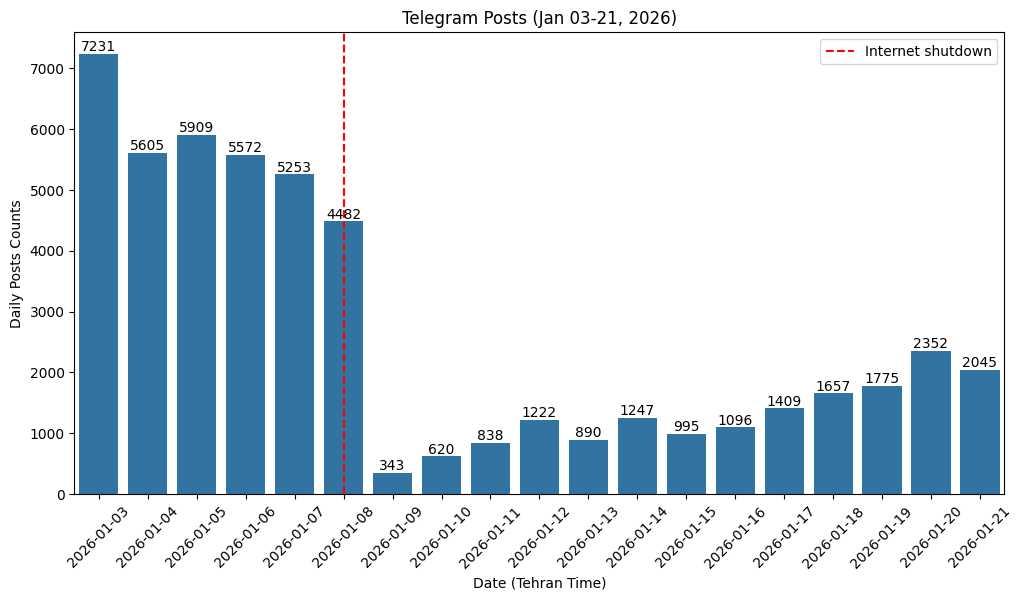

In [62]:

# Plot a count plot (total daily posts (all 48 channels) each daya)
plt.figure(figsize=(12,6))
sns.countplot(data=tg, x='date_tehran')
plt.bar_label(plt.gca().containers[0], fmt='%.0f')
plt.axvline(x='2026-01-08', color='red', linestyle='--', label = 'Internet shutdown')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel("Date (Tehran Time)")
plt.ylabel("Daily Posts Counts")
plt.title("Telegram Posts (Jan 03-21, 2026)")
plt.show()



### **2- Channels activity (total posts) between Jan 03 - 21 (سیزده دی تا اول بهمن)**





Text(0, 0.5, 'Number of Posts')

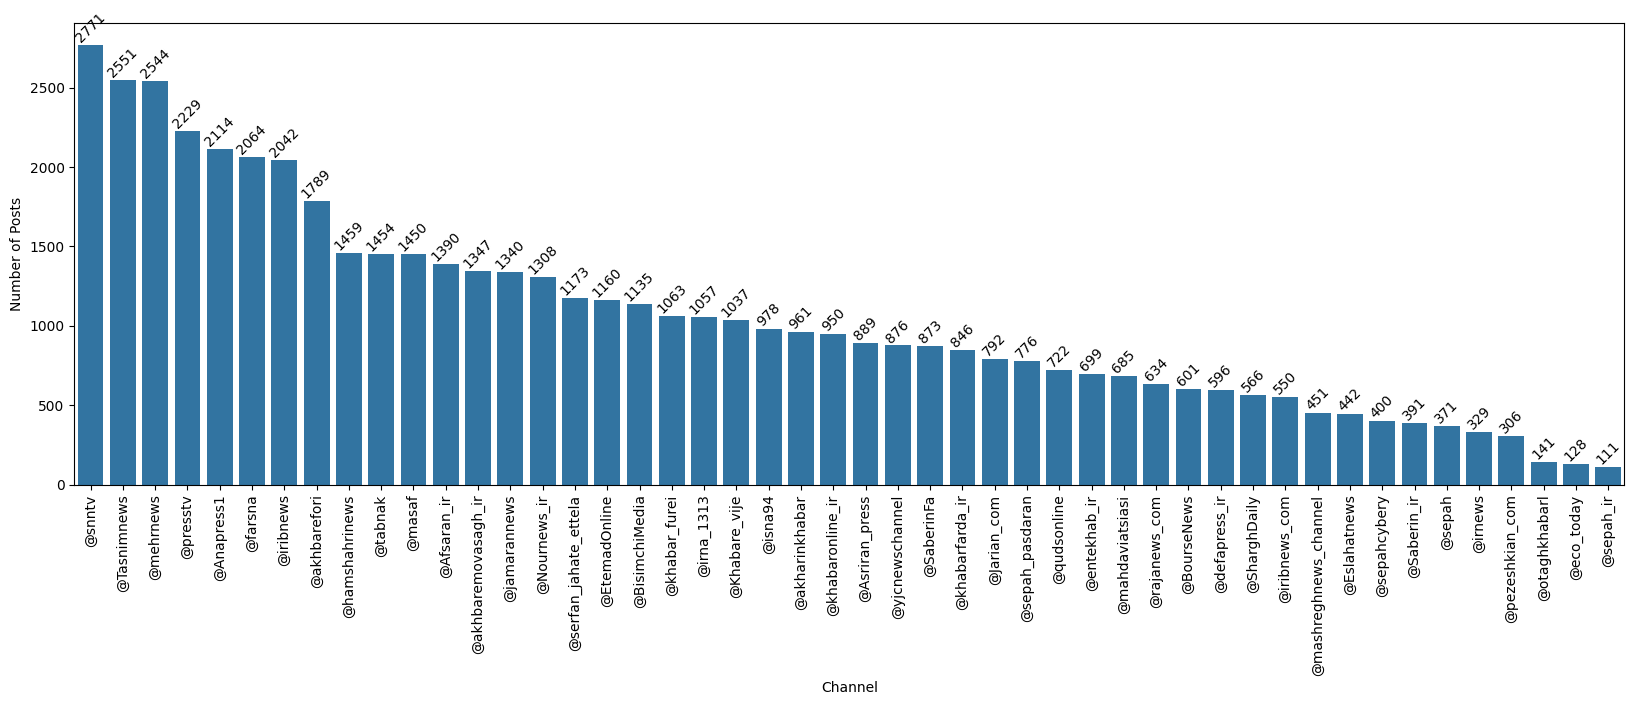

In [3]:

#group by channel and count posts

channel_counts = tg['channel_username'].value_counts().reset_index()
channel_counts.columns = ['channel_username', 'count']
channel_counts.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(20,6))
sns.barplot(data=channel_counts, x='channel_username', y='count')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', rotation=45)
plt.xticks(rotation=90)
plt.xlabel("Channel")
plt.ylabel("Number of Posts")



### **3- Internet Shutdown**



#### **3-1- Channels performance before and after internet shutdown (line charts)**





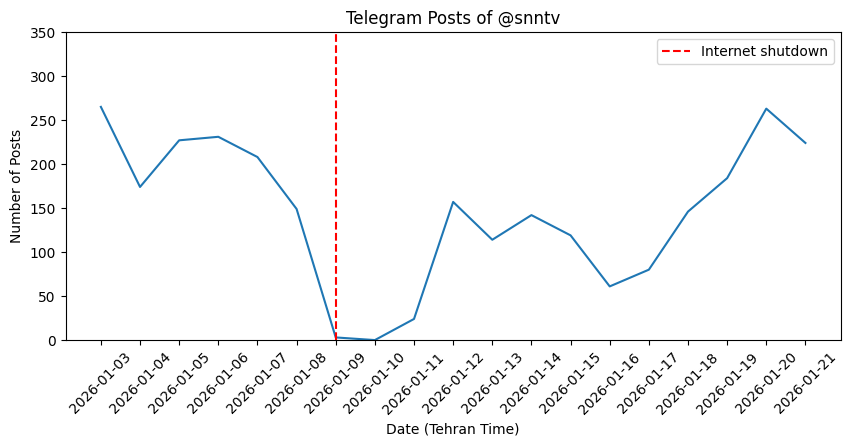

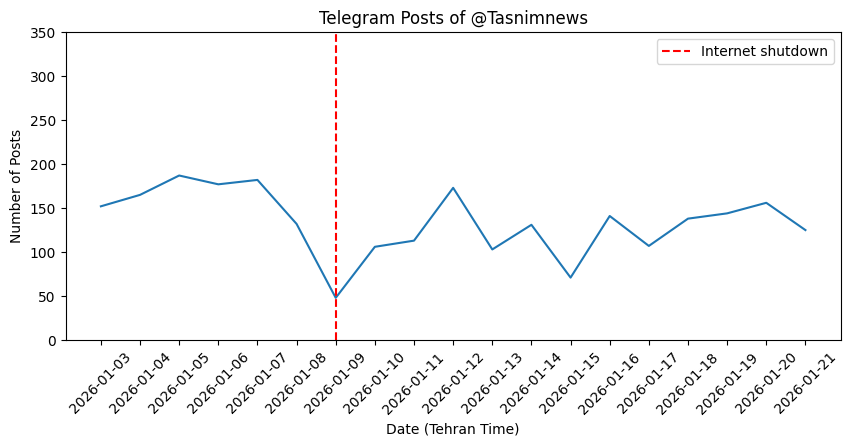

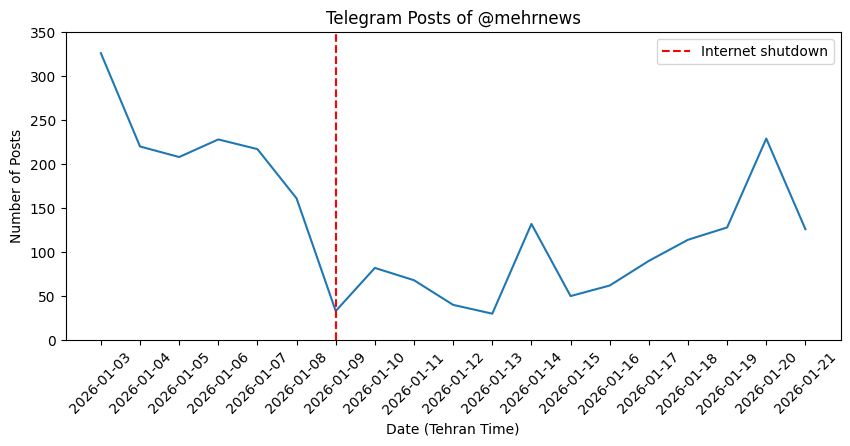

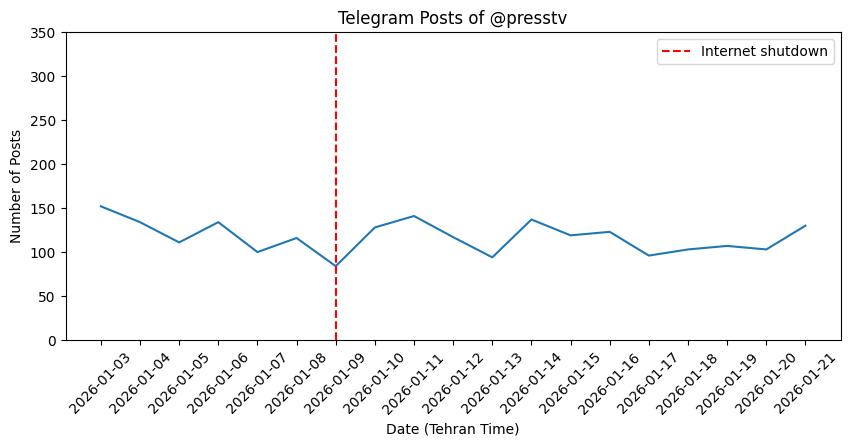

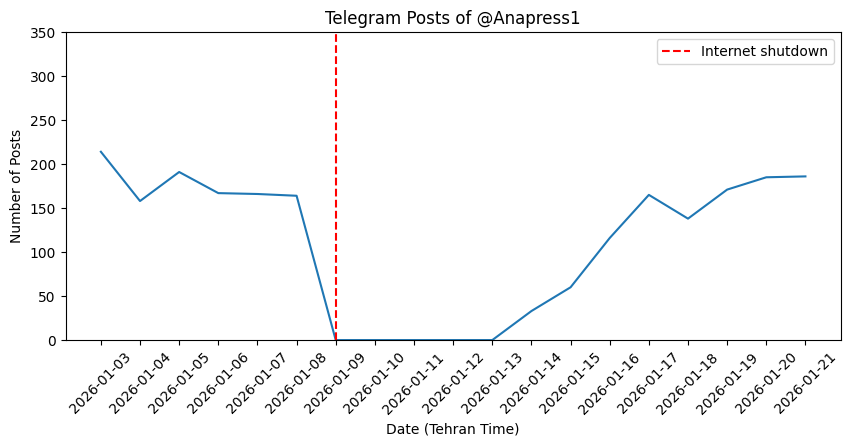

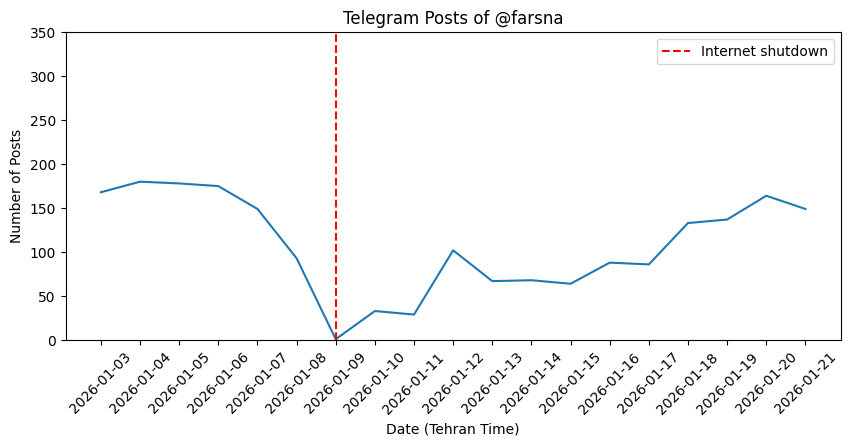

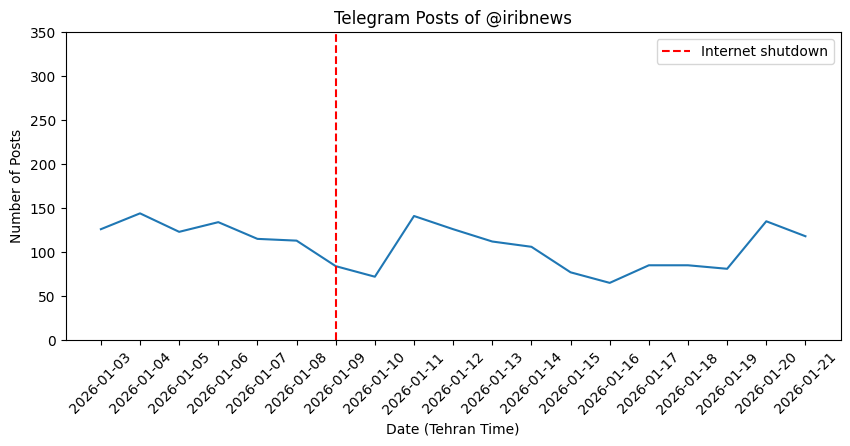

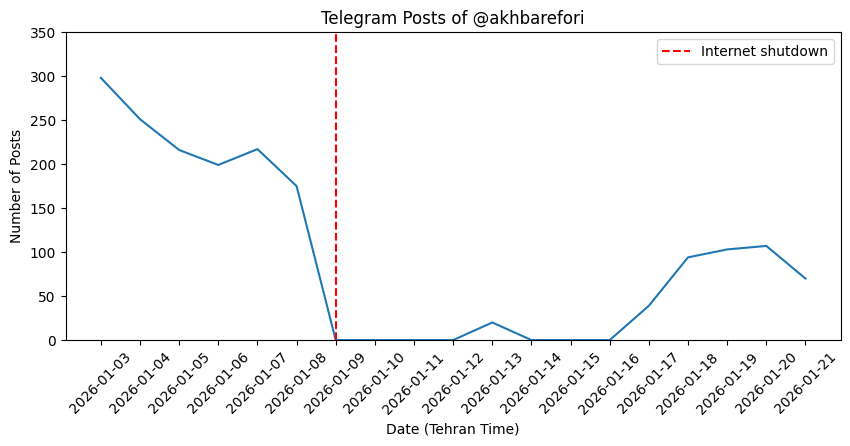

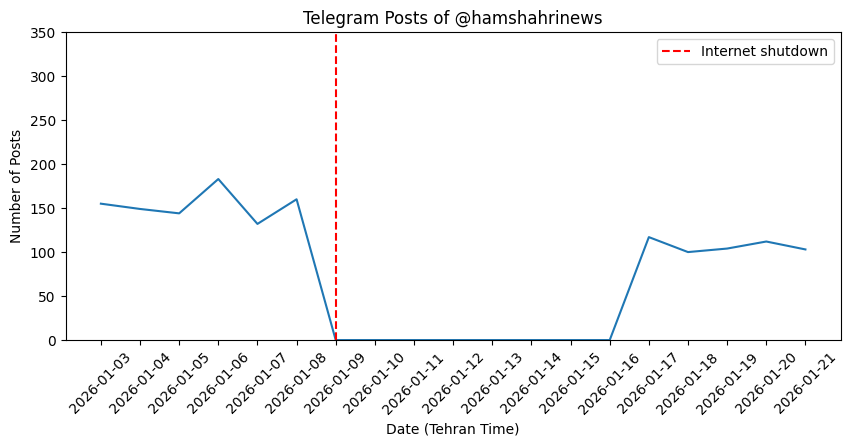

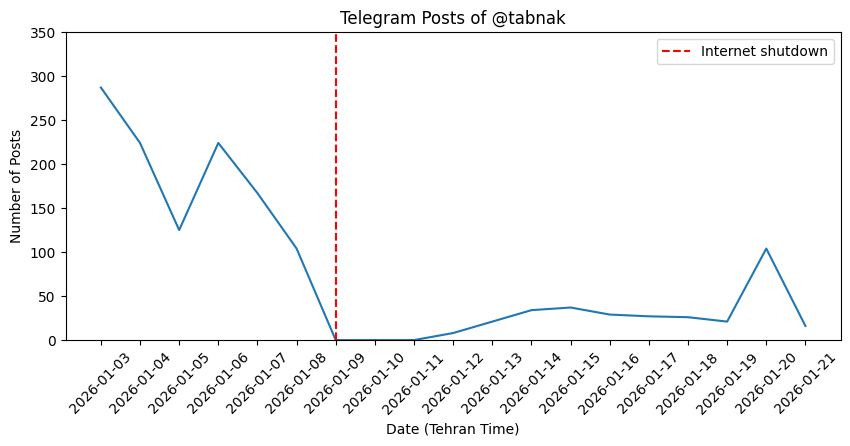

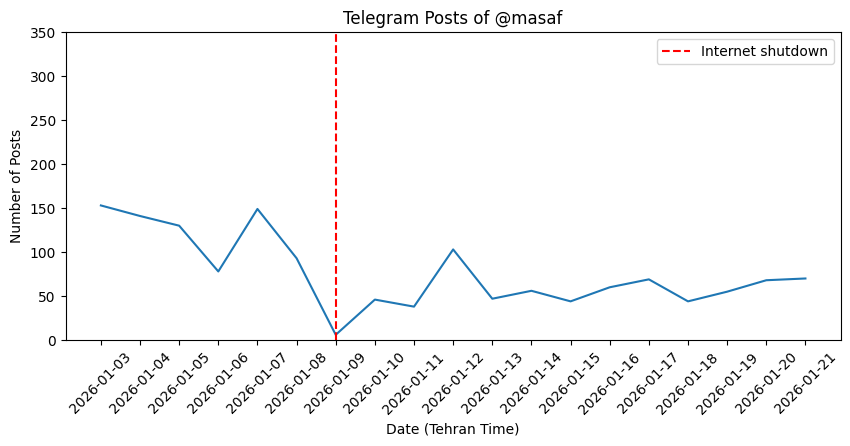

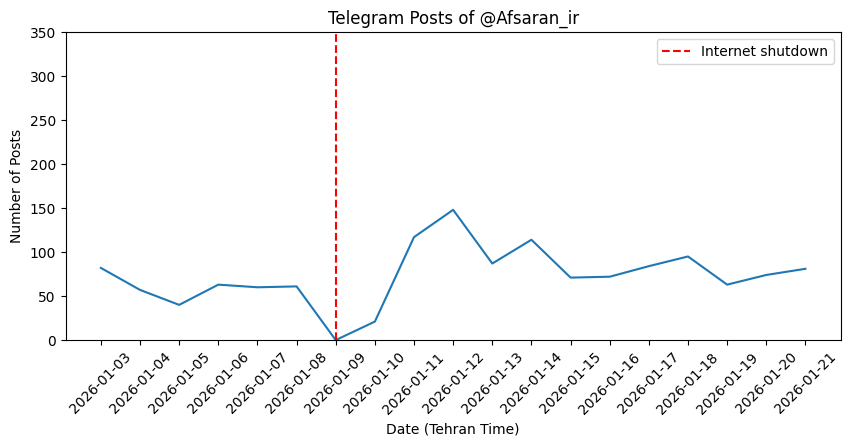

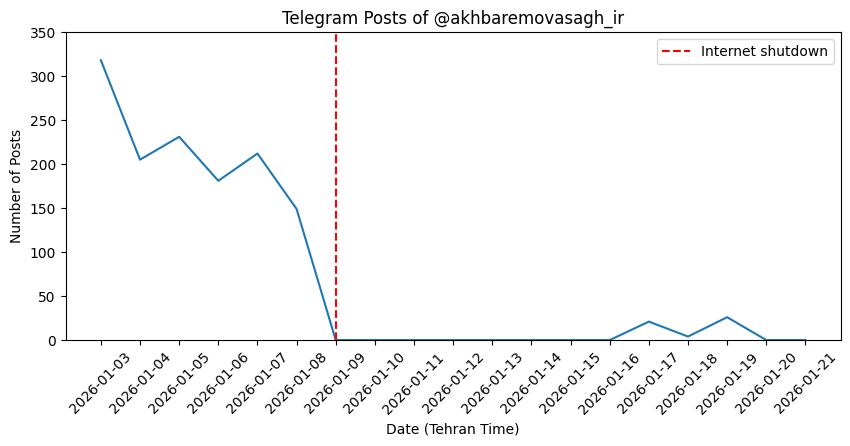

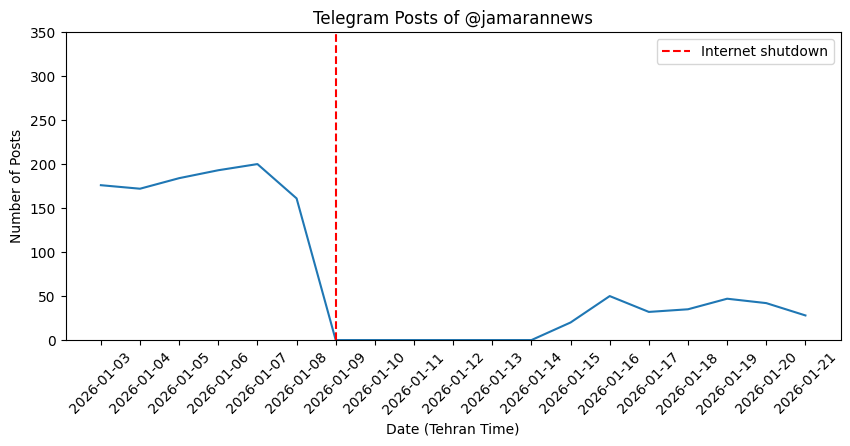

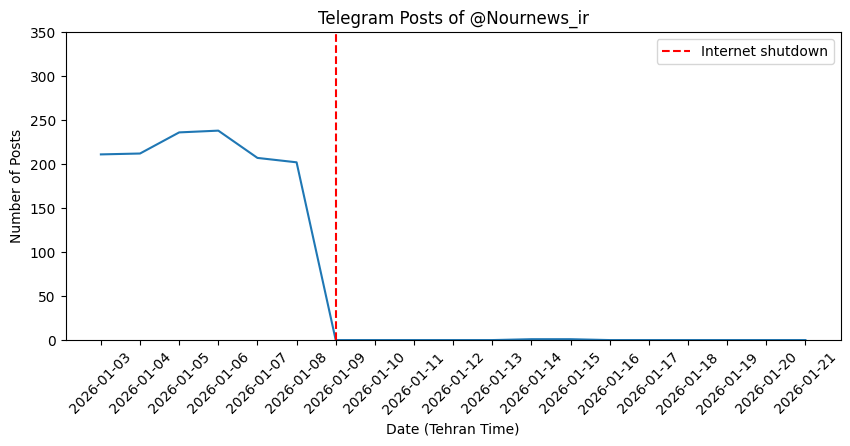

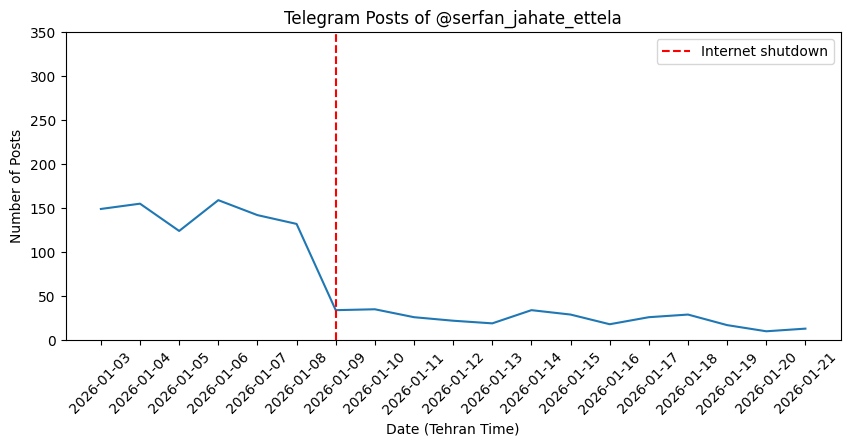

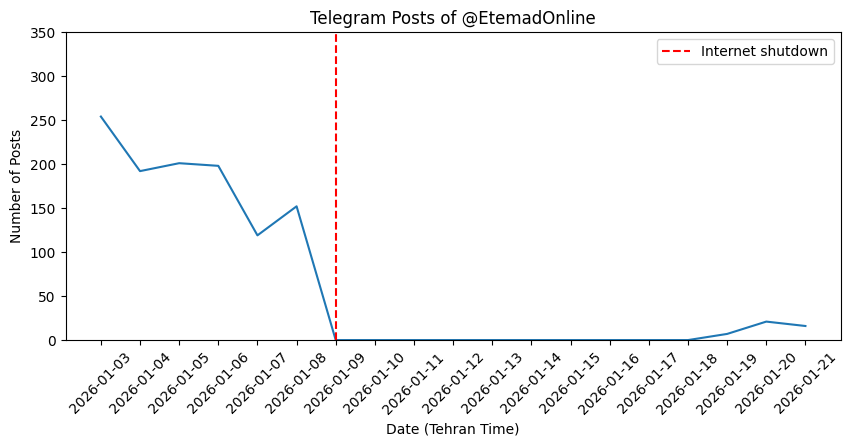

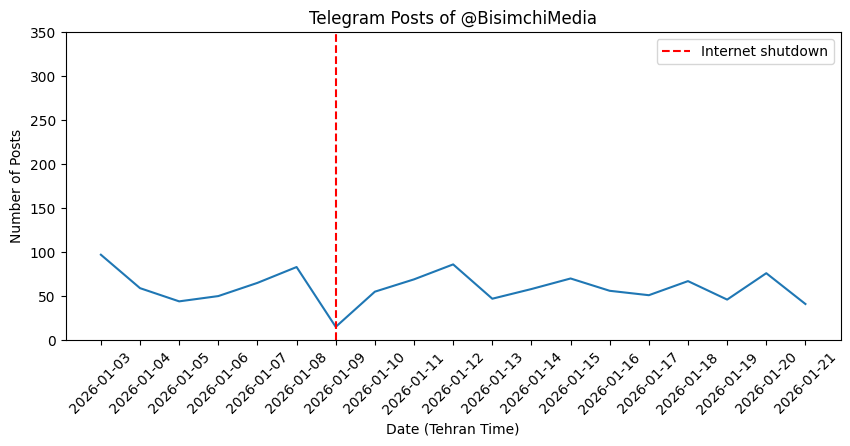

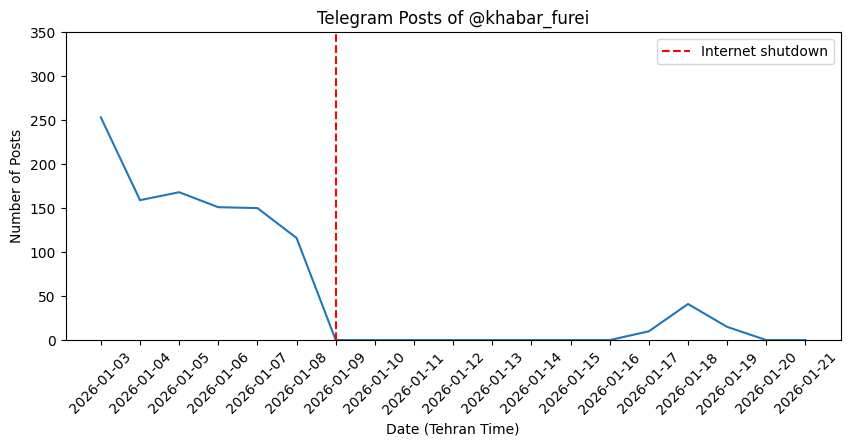

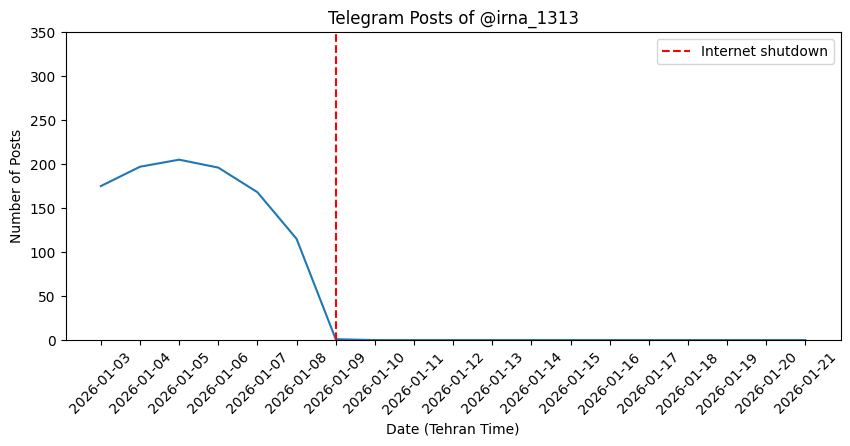

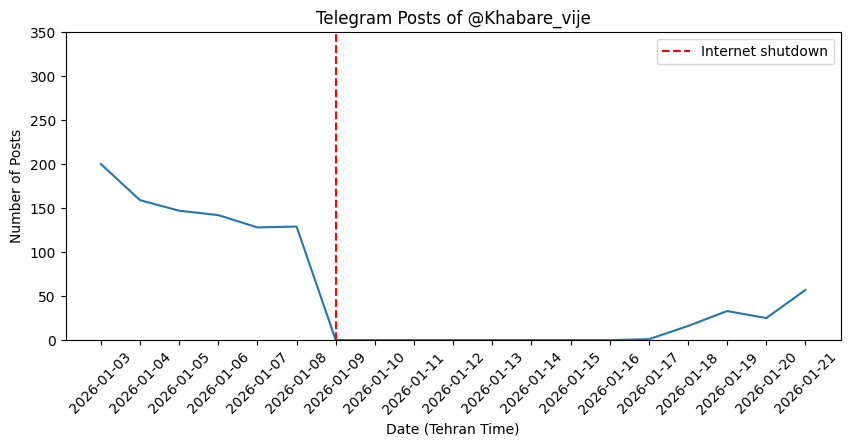

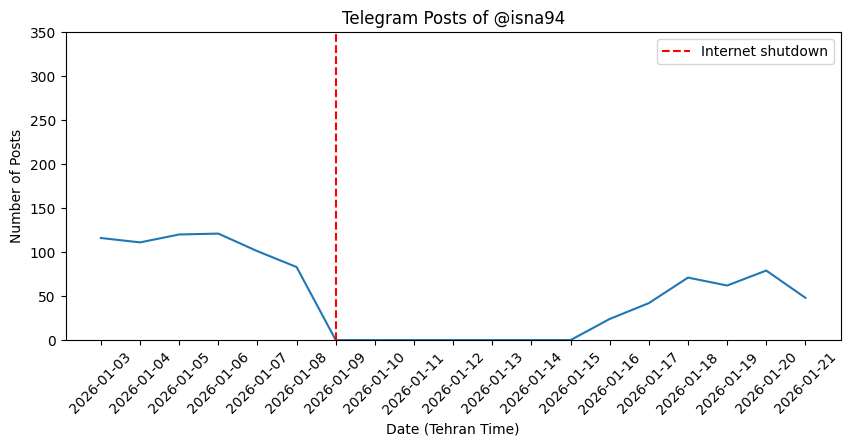

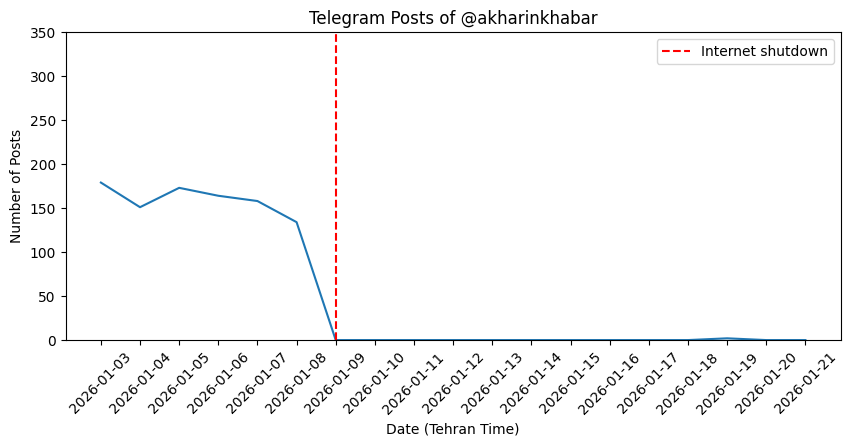

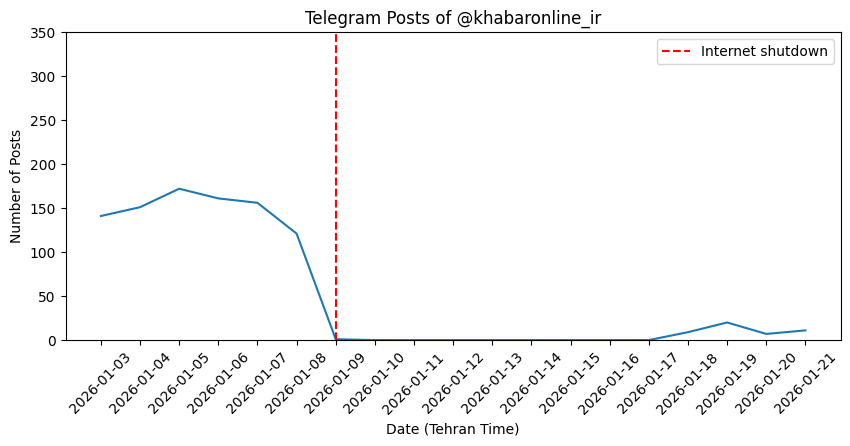

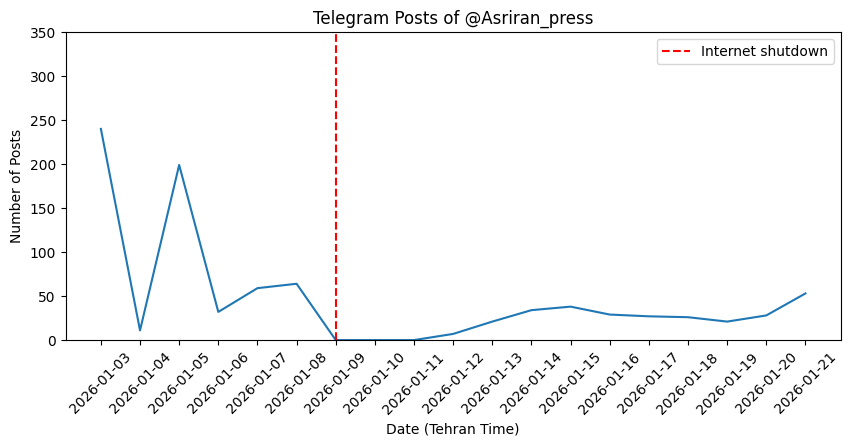

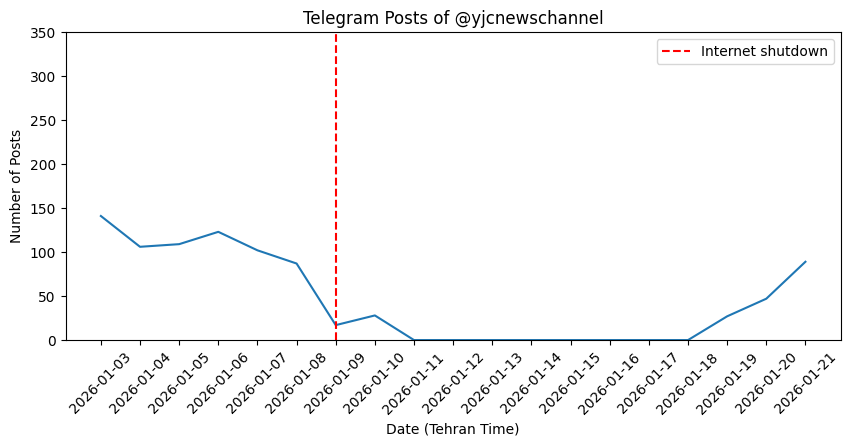

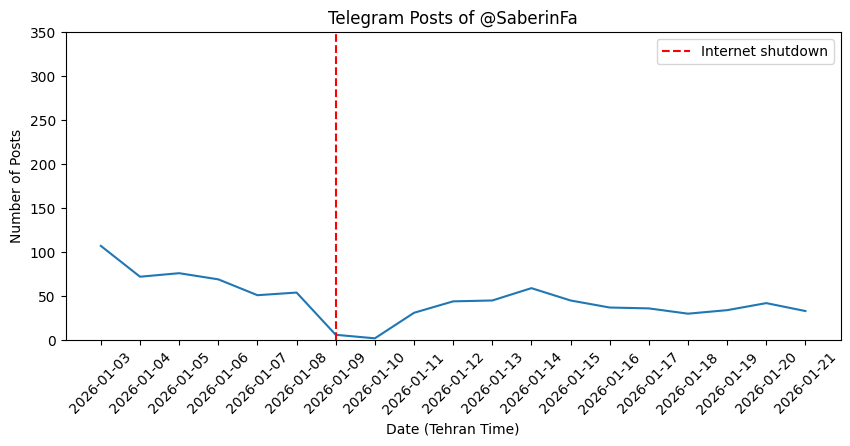

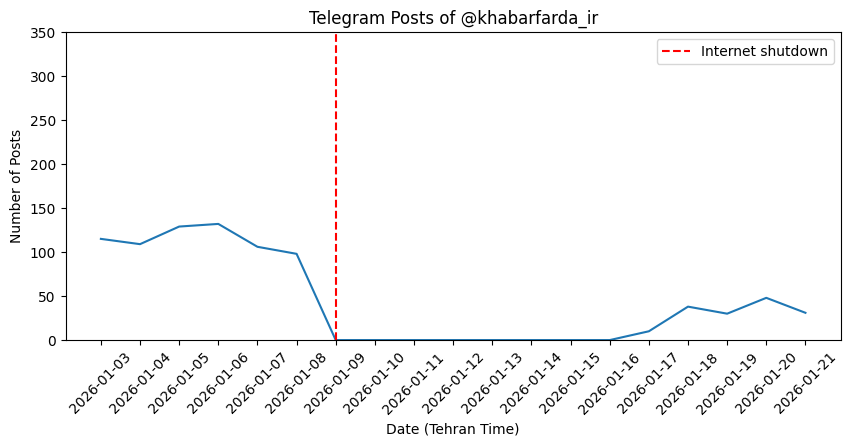

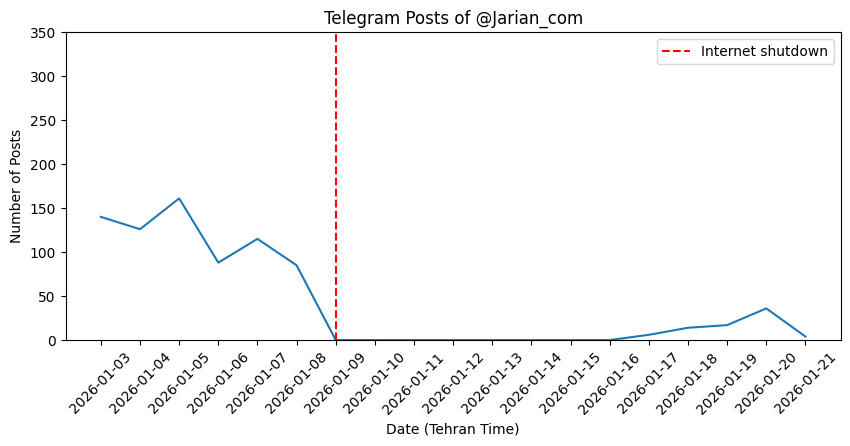

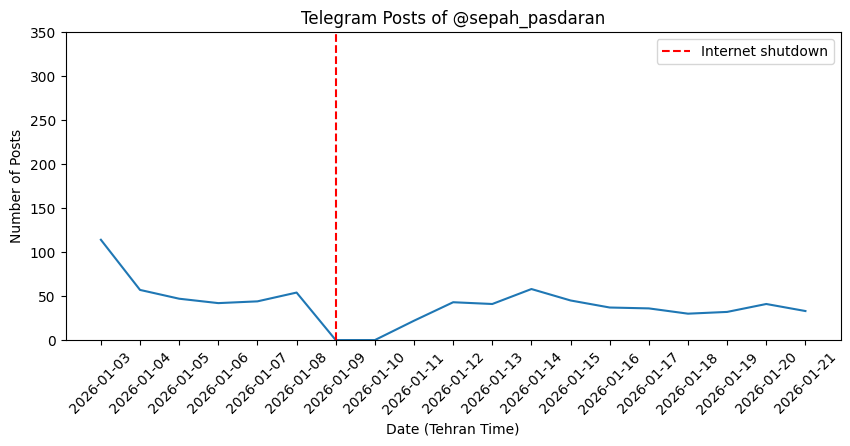

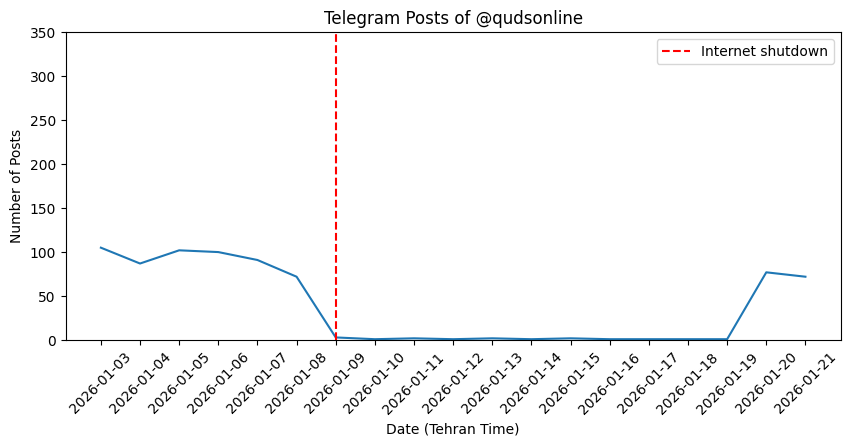

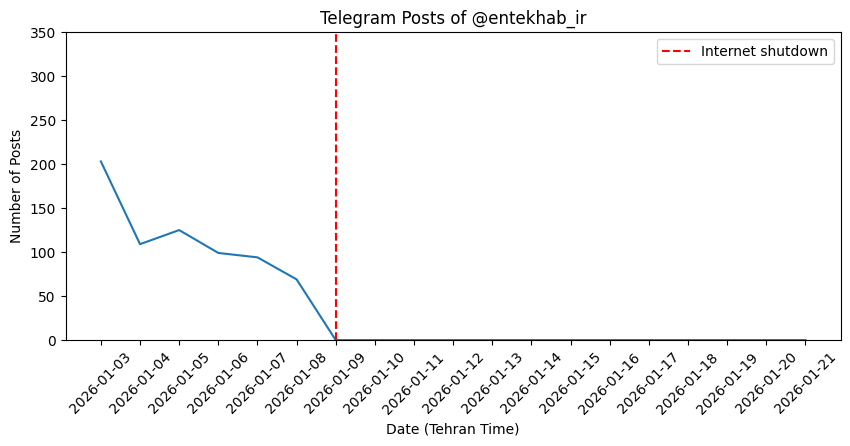

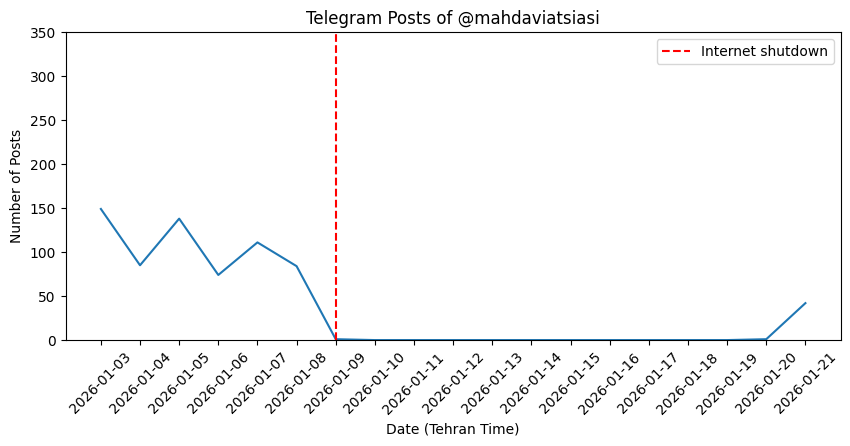

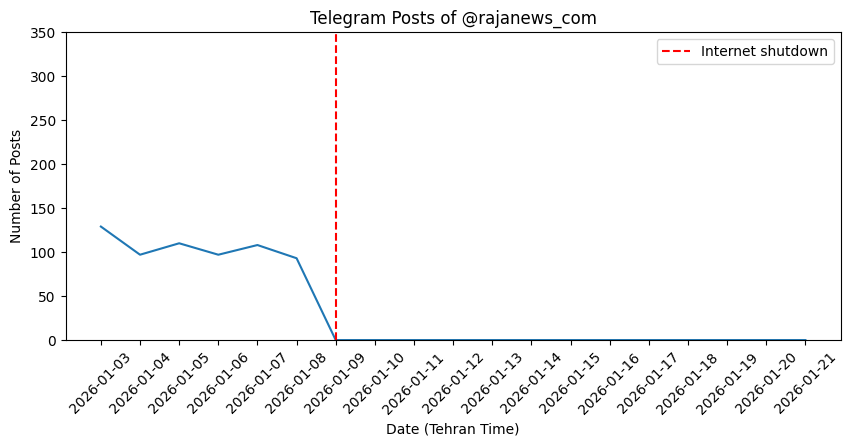

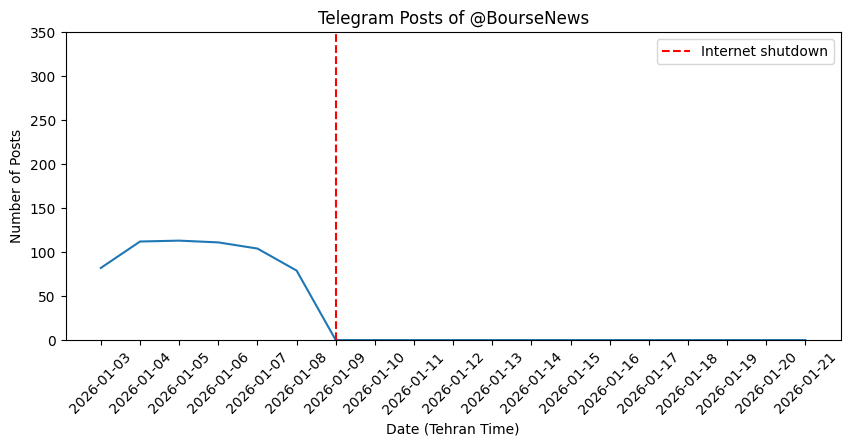

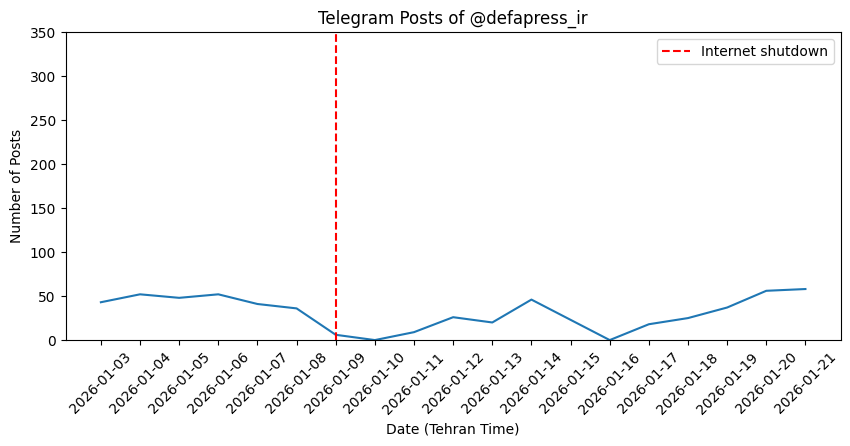

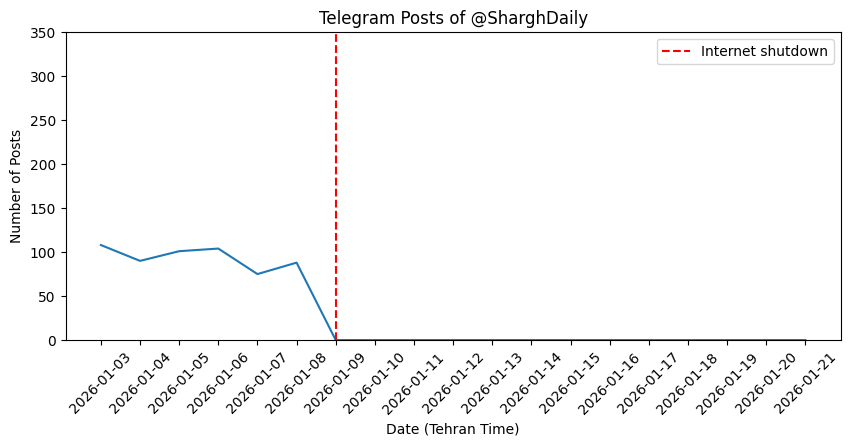

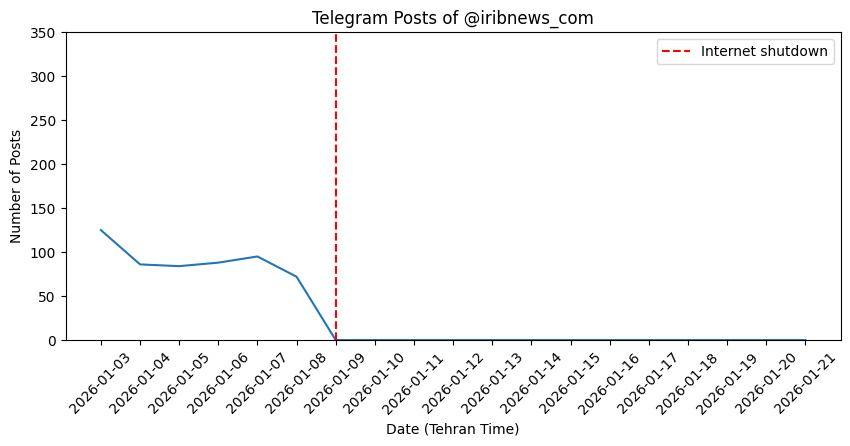

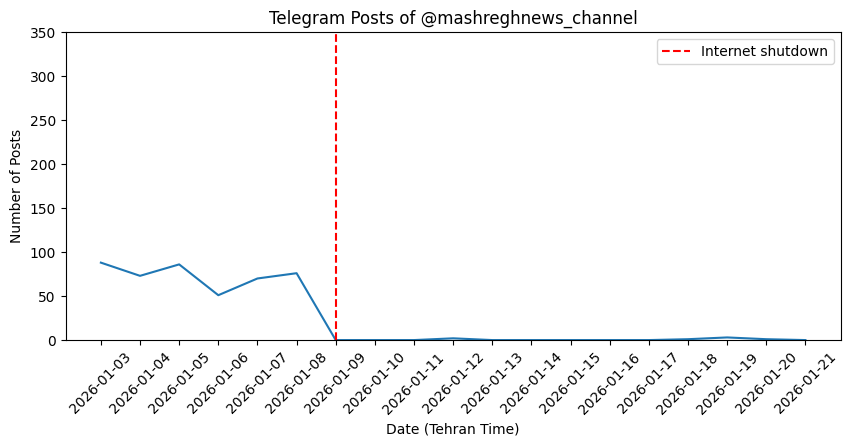

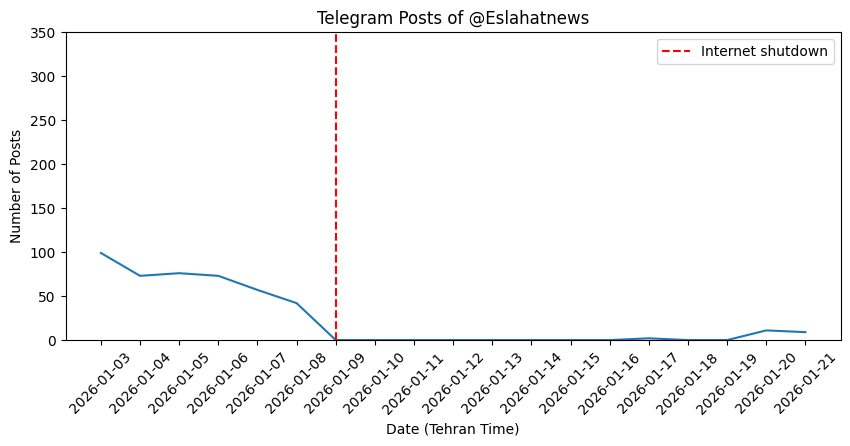

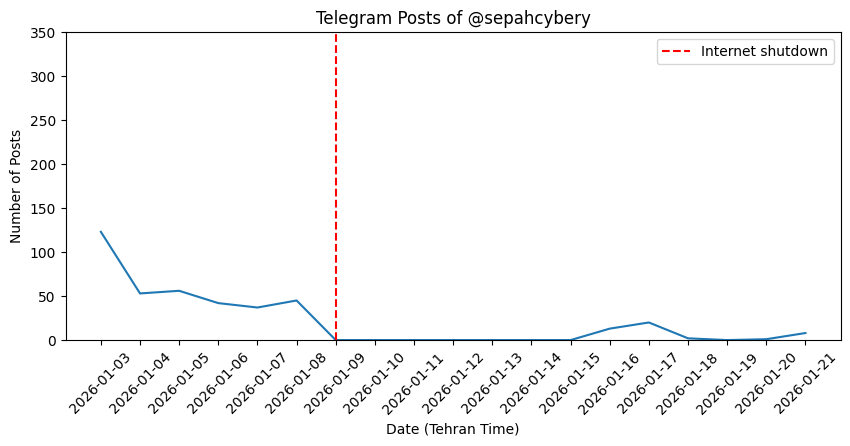

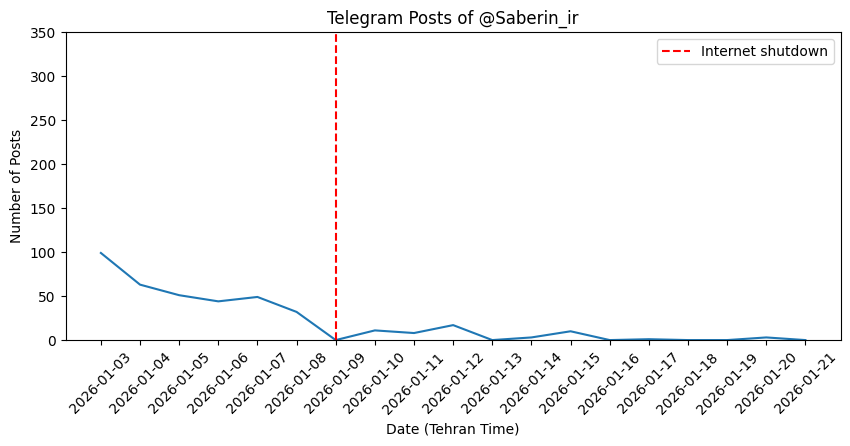

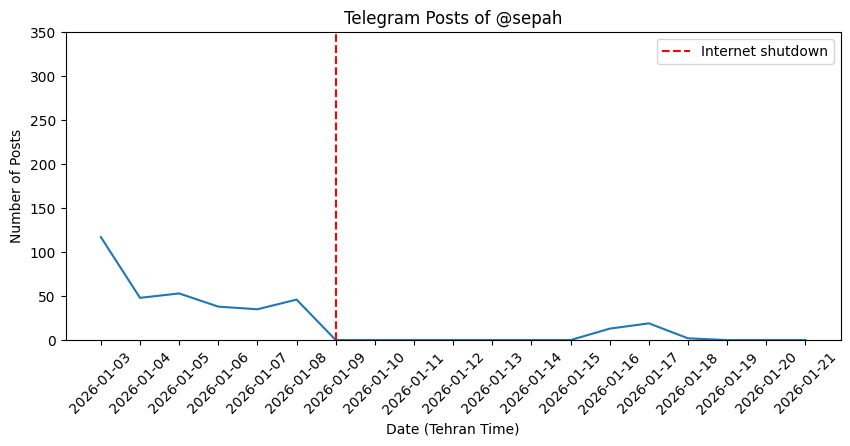

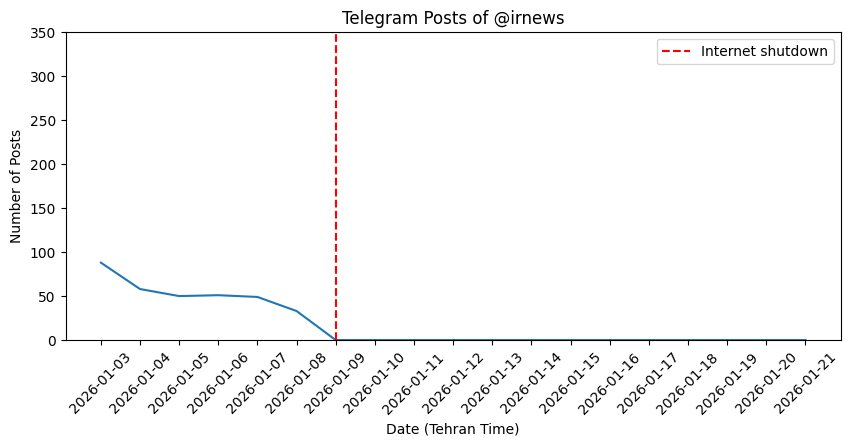

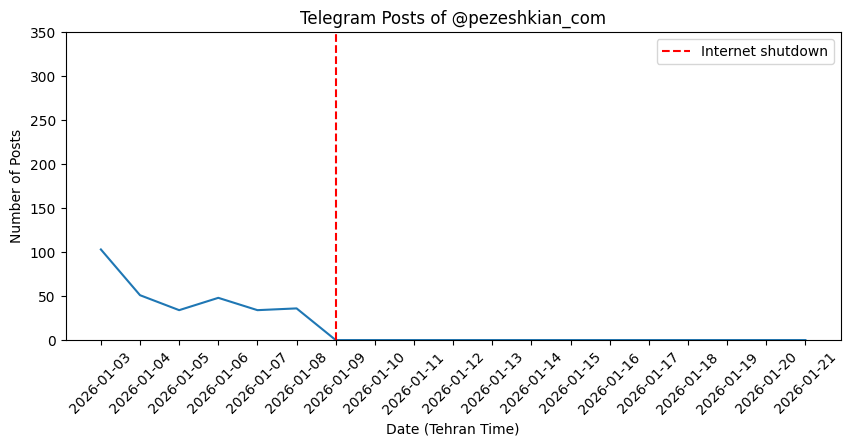

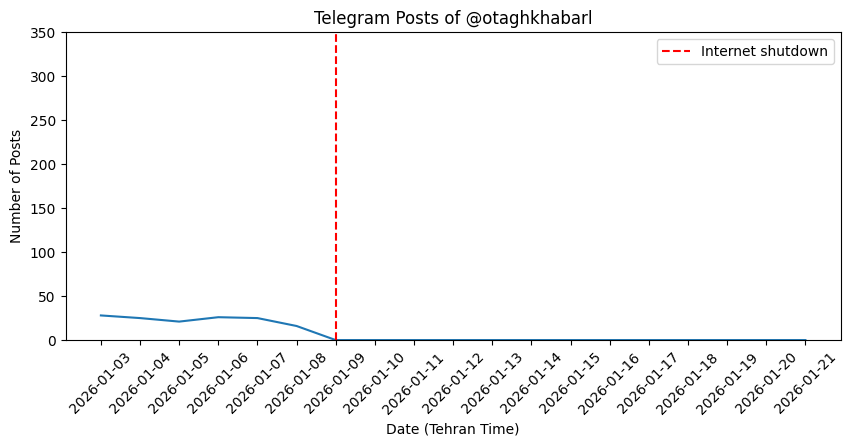

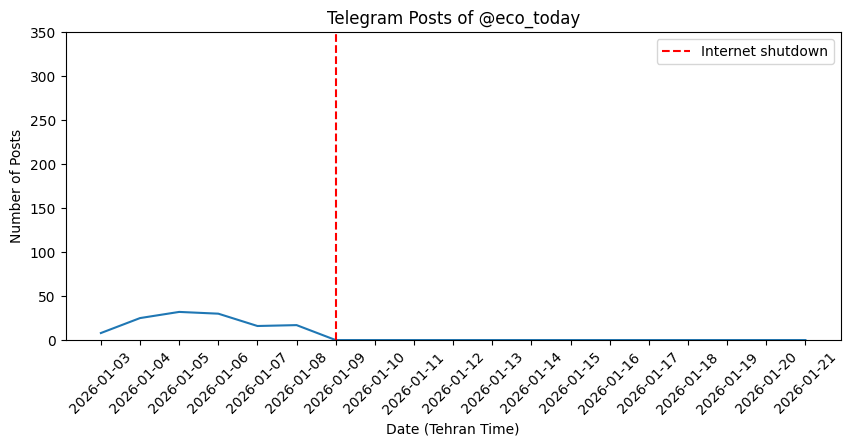

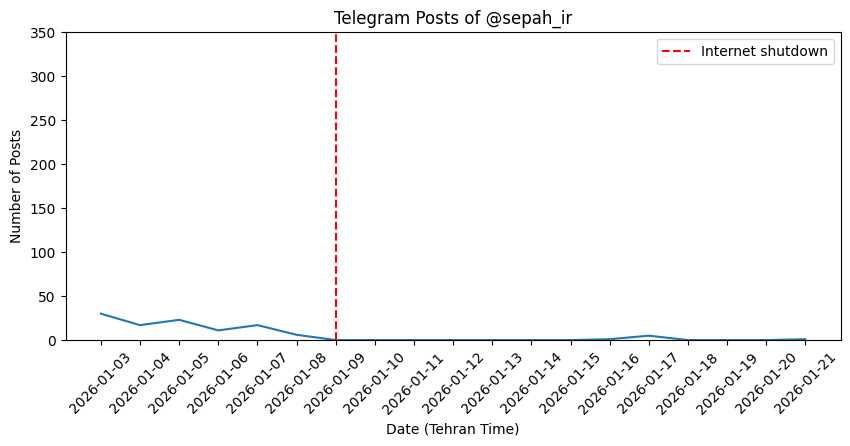

In [54]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

tg_chann_dayly = tg.groupby(['channel_username', 'date_tehran']).size().reset_index(name='count')

# Generate a complete date range from Jan 3 to Jan 21, 2026
start_date = '2026-01-03'
end_date = '2026-01-21'
date_range = pd.to_datetime(pd.date_range(start=start_date, end=end_date)).strftime('%Y-%m-%d')

# Get all unique channel usernames
all_channels = tg['channel_username'].unique()

# Create a DataFrame with all channel-date combinations
all_combinations = pd.MultiIndex.from_product([all_channels, date_range], names=['channel_username', 'date_tehran']).to_frame(index=False)

# Merge with the existing tg_chann_dayly and fill NaN counts with 0
tg_chann_dayly_full = pd.merge(all_combinations,
                                tg_chann_dayly,
                                on=['channel_username', 'date_tehran'],
                                how='left').fillna(0)

channs_list = channel_counts['channel_username'].unique()

for chan in channs_list:
  plt.figure(figsize=(10,4))
  sns.lineplot(data=tg_chann_dayly_full[tg_chann_dayly_full['channel_username'] == chan], x='date_tehran', y='count')
  plt.axvline(x='2026-01-09', color='red', linestyle='--', label = 'Internet shutdown')

  plt.xticks(rotation=45)
  plt.xlabel("Date (Tehran Time)")
  plt.ylabel("Number of Posts")
  plt.title(f"Telegram Posts of {chan}")
  plt.ylim(0, 350)
  plt.legend()
  plt.show()

#### **3-2- Compare channels activity 7 days before and 3days, 7 days and 14 days after internet shutdown**

In [5]:
#no internet Jan 9, 2026 to jan 15, 2026

tg_7days_before_jan8 = tg[(tg['date_hr'] >= '2026-01-02 00:00:00')
                   & (tg['date_hr'] < '2026-01-09 00:00:00')
                   ].sort_values(by='date_hr')

tg_noint_3 = tg[(tg['date_hr'] >= '2026-01-09 00:00:00')
                   & (tg['date_hr'] < '2026-01-12 00:00:00')
                   ].sort_values(by='date_hr')

tg_noint_7 = tg[(tg['date_hr'] >= '2026-01-09 00:00:00')
                   & (tg['date_hr'] < '2026-01-16 00:00:00')
                   ].sort_values(by='date_hr')

tg_noint_14 = tg[(tg['date_hr'] >= '2026-01-09 00:00:00')
                   & (tg['date_hr'] < '2026-01-22 00:00:00')
                   ].sort_values(by='date_hr')


#groupby channels by daily average posts
def daily_avg(df, label):
    return (
        round(df.groupby(["channel_username", "date_tehran"])
          .size()
          .groupby("channel_username")
          .mean()
          .reset_index(name=label), 0)
    )

avg_7_before = daily_avg(tg_7days_before_jan8, "avg_posts_per_day (7 days before Jan 8)")
avg_3 = daily_avg(tg_noint_3, "avg_posts_per_day (3 days)")
avg_7 = daily_avg(tg_noint_7, "avg_posts_per_day (7 days)")
avg_14 = daily_avg(tg_noint_14, "avg_posts_per_day (14 days)")


# merge tg_channels
tg_chans = (
    avg_7_before
    .merge(avg_3, on="channel_username", how="outer")
    .merge(avg_7, on="channel_username", how="outer")
    .merge(avg_14, on="channel_username", how="outer")
    .fillna(0)
    .sort_values(by="avg_posts_per_day (3 days)", ascending=False)
    .reset_index(drop=True)
)
tg_chans

channel_username  avg_posts_per_day (7 days before Jan 8)  \
0                @presstv                                    124.0   
1               @iribnews                                    126.0   
2             @Tasnimnews                                    166.0   
3             @Afsaran_ir                                     60.0   
4               @mehrnews                                    227.0   
5          @BisimchiMedia                                     66.0   
6   @serfan_jahate_ettela                                    144.0   
7                  @masaf                                    124.0   
8         @sepah_pasdaran                                     60.0   
9         @yjcnewschannel                                    111.0   
10                @farsna                                    157.0   
11                 @snntv                                    209.0   
12             @SaberinFa                                     72.0   
13            @Saberin_ir                                     56.0   
14          @defapress_ir                                     45.0   
15            @qudsonline                                     93.0   
16        @mahdaviatsiasi                                    107.0   
17       @khabaronline_ir                                    150.0   
18             @irna_1313                                    176.0   
19           @SharghDaily                                     94.0   
20           @akhbarefori                                    226.0   
21         @akharinkhabar                                    160.0   
22          @EtemadOnline                                    186.0   
23            @Jarian_com                                    119.0   
24         @Asriran_press                                    101.0   
25             @Anapress1                                    177.0   
26            @BourseNews                                    100.0   
27          @Khabare_vije                                    151.0   
28           @Nournews_ir                                    218.0   
29           @Eslahatnews                                     70.0   
30           @entekhab_ir                                    116.0   
31    @akhbaremovasagh_ir                                    216.0   
32          @khabar_furei                                    166.0   
33        @khabarfarda_ir                                    115.0   
34                @isna94                                    109.0   
35           @jamarannews                                    181.0   
36                @irnews                                     55.0   
37             @eco_today                                     21.0   
38         @hamshahrinews                                    154.0   
39          @iribnews_com                                     92.0   
40          @rajanews_com                                    106.0   
41        @pezeshkian_com                                     51.0   
42  @mashreghnews_channel                                     74.0   
43          @otaghkhabarl                                     24.0   
44           @sepahcybery                                     59.0   
45              @sepah_ir                                     17.0   
46                 @sepah                                     56.0   
47                @tabnak                                    188.0   

    avg_posts_per_day (3 days)  avg_posts_per_day (7 days)  \
0                        118.0                       117.0   
1                         99.0                       103.0   
2                         89.0                       106.0   
3                         69.0                        93.0   
4                         61.0                        62.0   
5                         46.0                        57.0   
6                         32.0                        28.0   
7                         30.0                        49.0   
8                   

In [8]:
#changes in avg posts per day
tg_changes = tg_chans.copy()

tg_changes['change_7d_vs_3d'] = round(((tg_changes['avg_posts_per_day (3 days)']/ tg_changes['avg_posts_per_day (7 days before Jan 8)'])-1)*100, 2)
tg_changes['change_7d_vs_7d'] = round(((tg_changes['avg_posts_per_day (7 days)']/ tg_changes['avg_posts_per_day (7 days before Jan 8)'])-1)*100, 2)
tg_changes['change_7d_vs_14d'] = round(((tg_changes['avg_posts_per_day (14 days)']/ tg_changes['avg_posts_per_day (7 days before Jan 8)'])-1)*100, 2)
tg_changes = tg_changes[['channel_username',
                         'change_7d_vs_3d',
                         'change_7d_vs_7d',
                         'change_7d_vs_14d']]

tg_changes = tg_changes.sort_values(by='change_7d_vs_3d', ascending=False).reset_index(drop=True)
tg_changes

channel_username  change_7d_vs_3d  change_7d_vs_7d  change_7d_vs_14d
0             @Afsaran_ir            15.00            55.00             43.33
1                @presstv            -4.84            -5.65             -8.06
2               @iribnews           -21.43           -18.25            -21.43
3          @BisimchiMedia           -30.30           -13.64            -13.64
4             @Tasnimnews           -46.39           -36.14            -27.71
5         @sepah_pasdaran           -63.33           -30.00            -36.67
6               @mehrnews           -73.13           -72.69            -59.91
7                  @masaf           -75.81           -60.48            -56.45
8   @serfan_jahate_ettela           -77.78           -80.56            -83.33
9         @yjcnewschannel           -80.18           -80.18            -62.16
10             @SaberinFa           -81.94           -54.17            -52.78
11            @Saberin_ir           -82.14           -82.14            -85.71
12          @defapress_ir           -82.22           -51.11            -35.56
13                @farsna           -86.62           -66.88            -45.22
14                 @snntv           -93.30           -55.50            -39.71
15            @qudsonline           -97.85           -97.85            -86.02
16        @mahdaviatsiasi           -99.07           -99.07            -85.98
17       @khabaronline_ir           -99.33           -99.33            -93.33
18             @irna_1313           -99.43           -99.43            -99.43
19           @SharghDaily          -100.00          -100.00           -100.00
20           @akhbarefori          -100.00           -91.15            -68.14
21         @akharinkhabar          -100.00          -100.00            -98.75
22          @EtemadOnline          -100.00          -100.00            -91.94
23            @Jarian_com          -100.00          -100.00            -87.39
24         @Asriran_press          -100.00           -75.25            -72.28
25             @Anapress1          -100.00           -74.01            -25.42
26            @BourseNews          -100.00          -100.00           -100.00
27          @Khabare_vije          -100.00          -100.00            -82.78
28           @Nournews_ir          -100.00           -99.54            -99.54
29           @Eslahatnews          -100.00          -100.00            -90.00
30           @entekhab_ir          -100.00          -100.00           -100.00
31    @akhbaremovasagh_ir          -100.00          -100.00            -92.13
32          @khabar_furei          -100.00          -100.00            -86.75
33        @khabarfarda_ir          -100.00          -100.00            -73.04
34                @isna94          -100.00          -100.00            -50.46
35           @jamarannews          -100.00           -88.95            -80.11
36                @irnews          -100.00          -100.00           -100.00
37             @eco_today          -100.00          -100.00           -100.00
38         @hamshahrinews          -100.00          -100.00            -30.52
39          @iribnews_com          -100.00          -100.00           -100.00
40          @rajanews_com          -100.00          -100.00           -100.00
41        @pezeshkian_com          -100.00          -100.00           -100.00
42  @mashreghnews_channel          -100.00           -97.30            -97.30
43          @otaghkhabarl          -100.00          -100.00           -100.00
44           @sepahcybery          -100.00          -100.00            -84.75
45              @sepah_ir          -100.00          -100.00            -88.24
46                 @sepah          -100.00          -100.00            -80.36
47                @tabnak          -100.00           -86.70            -82.98

## **4- White List**

 #### **4-1- Three days white list (channels active in the first 3 days of internet shutdown)?**

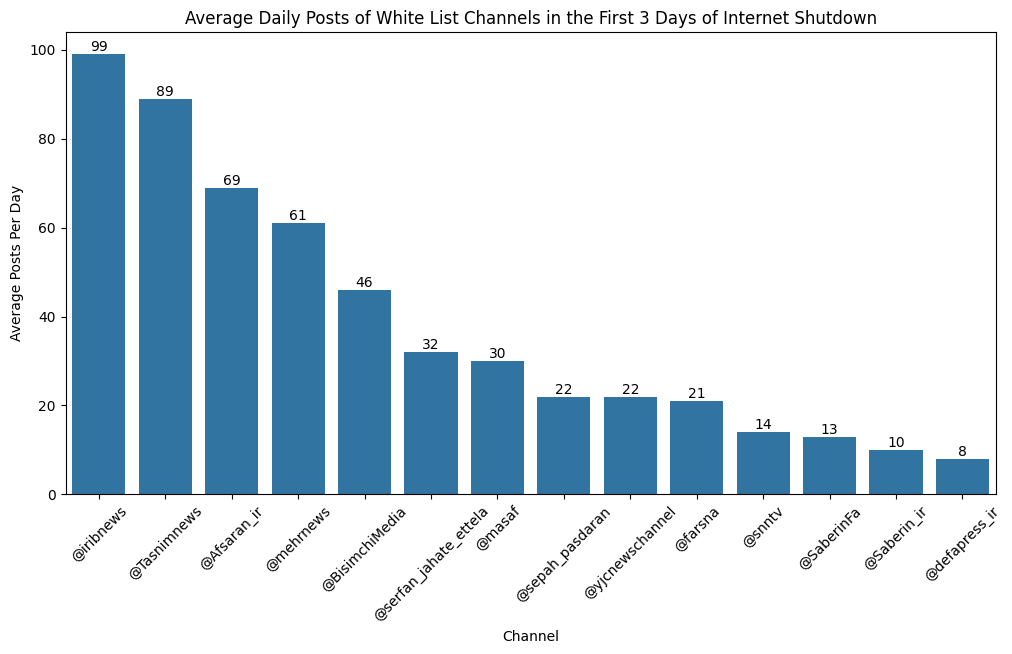

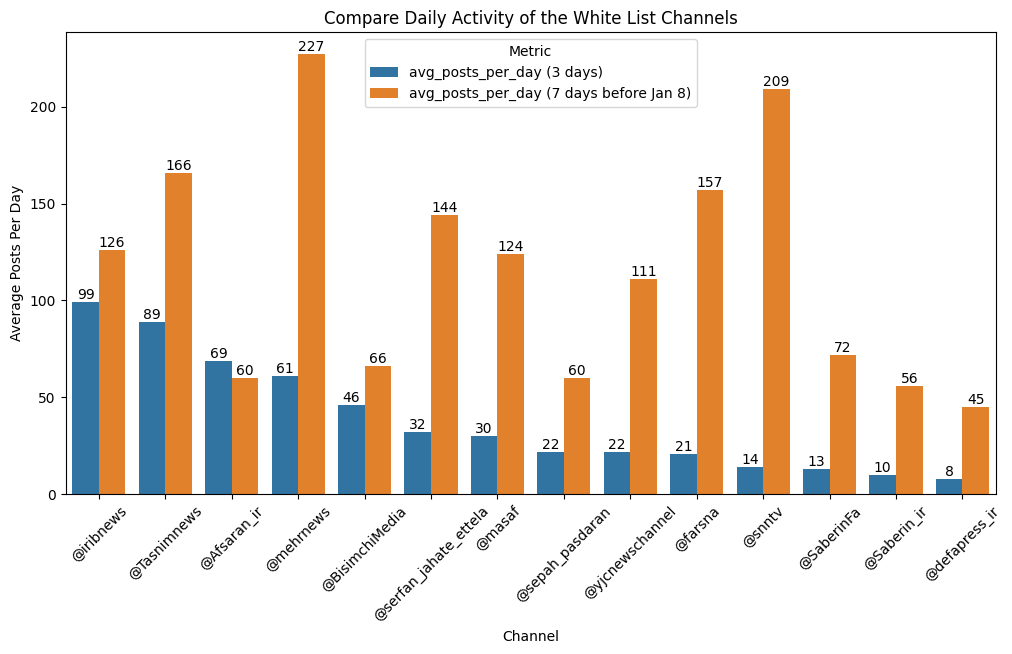

In [61]:

#filter out the press tv from avg_3
plt.figure(figsize=(12,6))
df = avg_3[avg_3['channel_username'] != '@presstv'].sort_values(by='avg_posts_per_day (3 days)',ascending=False).head(14)
sns.barplot(data=df, x='channel_username',y='avg_posts_per_day (3 days)')
plt.bar_label(plt.gca().containers[0], fmt='%.0f')
plt.xticks(rotation=45)
plt.title("Average Daily Posts of White List Channels in the First 3 Days of Internet Shutdown")
plt.xlabel("Channel")
plt.ylabel("Average Posts Per Day")
plt.show()

# compare 3 days to average 7 days before
plt.figure(figsize=(12,6))
df_1 = df.merge(avg_7_before, on='channel_username', how='left')

# Melt df_1 for plotting both metrics
df_1_melted = df_1.melt(id_vars='channel_username',
                      value_vars=['avg_posts_per_day (3 days)', 'avg_posts_per_day (7 days before Jan 8)'],
                      var_name='Time Period',
                      value_name='Average Posts Per Day')

sns.barplot(data=df_1_melted, x='channel_username', y='Average Posts Per Day', hue='Time Period')
plt.bar_label(plt.gca().containers[0], fmt='%.0f') # for the first set of bars (e.g., 3 days)
plt.bar_label(plt.gca().containers[1], fmt='%.0f') # for the second set of bars (e.g., 7 days before)
plt.xticks(rotation=45)
plt.title("Compare Daily Activity of the White List Channels")
plt.xlabel("Channel")
plt.ylabel("Average Posts Per Day")
plt.legend(title='Metric') # Add a legend to distinguish the bars
plt.show()

 #### **4-2- Seven days white list (channels active in the first 7 days of internet shutdown)**

Text(0, 0.5, 'Average Posts Per Day')

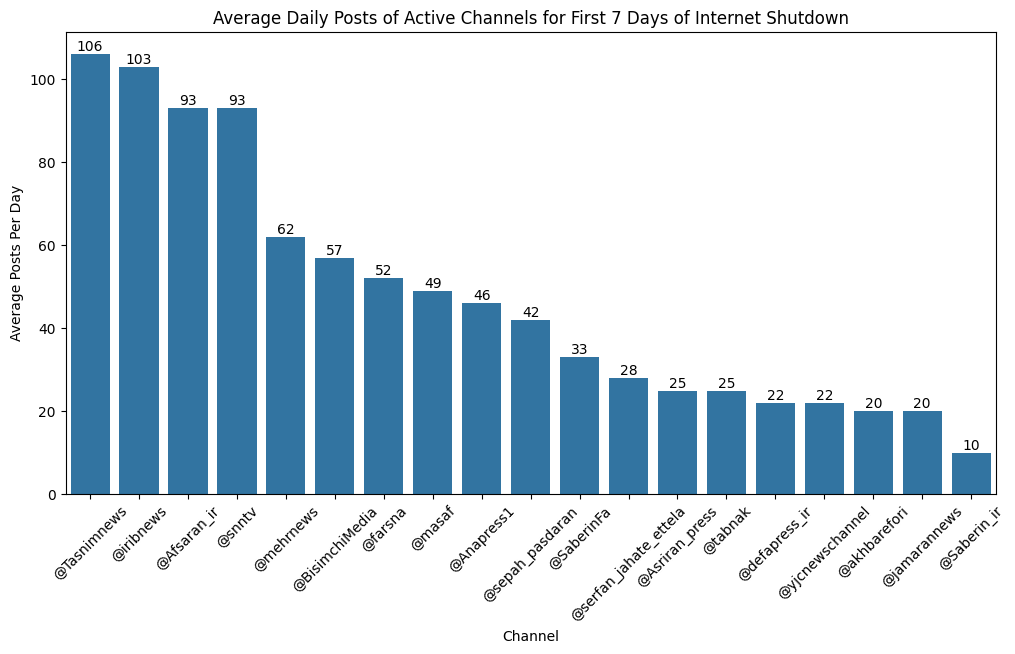

In [64]:
plt.figure(figsize=(12,6))

#filter out the press tv from avg_7
df = avg_7[avg_7['channel_username'] != '@presstv'].sort_values(by='avg_posts_per_day (7 days)',ascending=False).head(19)
sns.barplot(data=df, x='channel_username',y='avg_posts_per_day (7 days)')
plt.bar_label(plt.gca().containers[0], fmt='%.0f')
plt.xticks(rotation=45)
plt.title("Average Daily Posts of Active Channels for First 7 Days of Internet Shutdown")
plt.xlabel("Channel")
plt.ylabel("Average Posts Per Day")

### **5 - Content Analysis**

#### **5-1- Calculate the text similarity**

In [18]:

##detect the copy_paste posts

from itertools import combinations

# split → set of words, handle NaN values
tg_3["wordset"] = tg_3["text"].fillna("").str.split(" ").apply(set)

#drop the channel_usename from the list:
tg_3["wordset"] = tg_3["wordset"].apply(lambda x: x - {tg_3["channel_username"].iloc[0]})

total = (tg_3["text"].fillna("").str.strip() != "").sum()
print("Total posts with text in 3 days:", total)

similar_pairs = []
ws = tg_3["wordset"].tolist()


for similarity_threshold in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]:
    similar_pairs = []


    for i, j in combinations(range(len(ws)), 2):
        a, b = ws[i], ws[j]
        if not a or not b:
            continue
        inter = len(a & b)
        union = len(a | b)
        sim = inter / union
        if sim >= similarity_threshold:
            similar_pairs.append((i, j))


    near_dup_indices = set([i for p in similar_pairs for i in p])
    print(f"Posts with ≥{similarity_threshold*100}% similarity: {len(near_dup_indices)}, Rate: {round(len(near_dup_indices)/total*100,2)}%")


tg_3_similar = tg_3.iloc[list(near_dup_indices)]


Total posts with text in 3 days: 1191
Posts with ≥50.0% similarity: 957, Rate: 80.35%
Posts with ≥60.0% similarity: 882, Rate: 74.06%
Posts with ≥70.0% similarity: 771, Rate: 64.74%
Posts with ≥80.0% similarity: 590, Rate: 49.54%
Posts with ≥90.0% similarity: 372, Rate: 31.23%
Posts with ≥95.0% similarity: 263, Rate: 22.08%


#### **5-2- copy_paste list (list of all posts with +50% similarity)**

In [20]:

thr = 0.5

# Clean wordsets (empty/NaN -> empty set)
ws = tg_3["wordset"].tolist()

# Build degree (how many near-duplicate matches each post has)
degree = [0] * len(ws)

for i, j in combinations(range(len(ws)), 2):
    a, b = ws[i], ws[j]
    if not a or not b:
        continue
    sim = len(a & b) / len(a | b)
    if sim >= thr:
        degree[i] += 1
        degree[j] += 1

tg_3["dup50_matches"] = degree

copy_paste = (
    tg_3[tg_3["dup50_matches"] > 0]
    .sort_values(["dup50_matches", 'date_hr'], ascending=[False,True])
    [["dup50_matches", "channel_username", "date_hr", "post_link", "text"]]
).dropna().reset_index(drop=True)

copy_paste.to_csv("copy_paste_posts.csv", index=False)
copy_paste


dup50_matches channel_username             date_hr  \
0                7        @iribnews 2026-01-11 10:42:00   
1                7        @mehrnews 2026-01-11 10:44:00   
2                7      @Tasnimnews 2026-01-11 10:45:00   
3                7   @BisimchiMedia 2026-01-11 11:26:00   
4                7      @Afsaran_ir 2026-01-11 13:02:00   
..             ...              ...                 ...   
715              1        @iribnews 2026-01-11 23:06:00   
716              1      @Tasnimnews 2026-01-11 23:09:00   
717              1    @defapress_ir 2026-01-11 23:31:00   
718              1   @BisimchiMedia 2026-01-11 23:39:00   
719              1        @mehrnews 2026-01-11 23:43:00   

                             post_link  \
0         https://t.me/iribnews/311333   
1         https://t.me/mehrnews/343776   
2       https://t.me/Tasnimnews/382970   
3    https://t.me/BisimchiMedia/154502   
4       https://t.me/Afsaran_ir/139402   
..                                 ...   
715       https://t.me/iribnews/311433   
716     https://t.me/Tasnimnews/383061   
717    https://t.me/defapress_ir/47087   
718  https://t.me/BisimchiMedia/154569   
719       https://t.me/mehrnews/343835   

                                                  text  
0    🎦اعترافات جدید تروریست‌های مسلح: گفتند باید به...  
1    🎦اعترافات جدید تروریست‌های مسلح: گفتند باید به...  
2    تروریست‌های مسلح: گفتند باید به سر شلیک کنید\n...  
3    ✅ اعترافات جدید تروریست‌های مسلح: گفتند باید ب...  
4    ✅ اعترافات جدید تروریست‌های مسلح: گفتند باید ب...  
..                                                 ...  
715  🎦 نایب رییس مجلس: رژیم صهیونیستی به دنبال دو ق...  
716  نایب رئیس مجلس: رژیم صهیونیستی به دنبال دو قطب...  
717  📹🎥تصاویر تخریب مسجد اباذر توسط تروریست‌های داع...  
718  ✅ ماجرای سوزناک ملینا؛ دختر ۳ ساله‌ای که باشلی...  
719  📹 ماجرای سوزناک ملینا؛ دختر ۳ ساله‌ای که باشلی...  

[720 rows x 5 columns]

#### **5-3- Word list (to make a word cloud)**

In [27]:
all_words_list = []
for word_set in tg_3['wordset']:
    if isinstance(word_set, set):
        all_words_list.extend(list(word_set))

#filter out latin alphabets
import re
all_words_list = [word for word in all_words_list if not re.match(r'^[a-zA-Z]+$', word)]

# filter out emojis
import emoji
all_words_list = [word for word in all_words_list if not emoji.is_emoji(word)]

words_df = pd.DataFrame(all_words_list, columns=['word'])
worldies = words_df['word'].value_counts().reset_index()
worldies.columns = ['word', 'count']
worldies.to_csv("all_words.csv", index=False)

print("Total Words: ", len(all_words_list))
print("Total Unique Words: ", len(worldies))
print("Words are saved in all_words.csv")


Total Words:  40652
Total Unique Words:  8495
Words are saved in all_words.csv


## **6- Compare the impact of the internet shutdown to the previous experience during Iran-Israel 12-day war (June 2025)**

## **6-1- Total the same channels activity during 12days war**

/tmp/ipython-input-1499465495.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tg_w['date'] = pd.to_datetime(tg_w['date'])


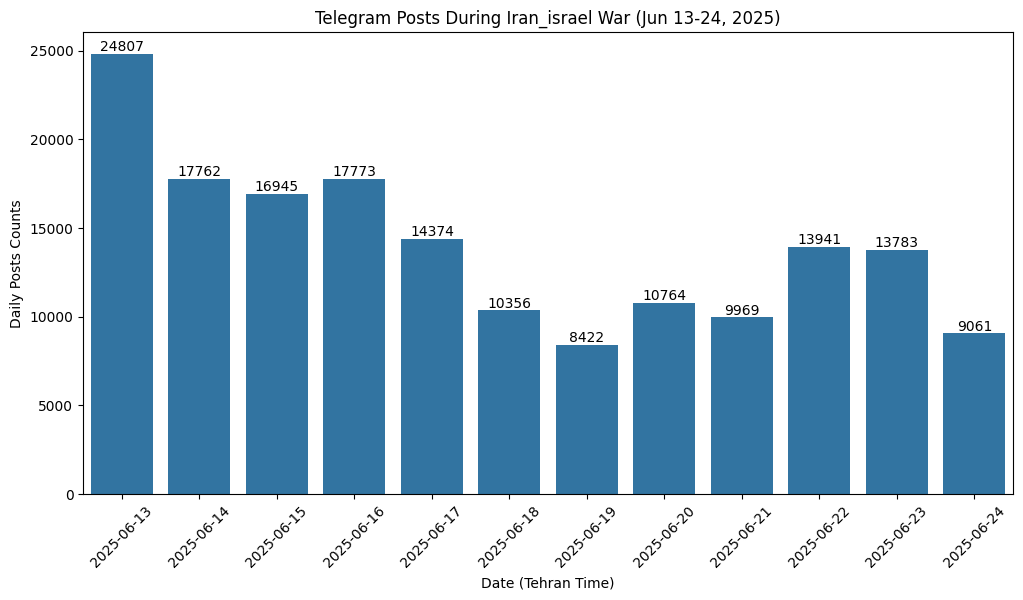

In [66]:
# reading data
tg_w = pd.read_csv("fctgposts_12days_war.csv")
tg_w['date'] = pd.to_datetime(tg_w['date'])

tg_w['day'] = tg_w['date'].dt.date
tg_w['hour'] = tg_w['date'].dt.hour
tg_w = tg_w[tg_w['day'] >= pd.to_datetime("2025-06-13").date()].sort_values(by='day').reset_index(drop=True)


#bar_chart
plt.figure(figsize=(12,6))
sns.countplot(data=tg_w, x='day')
plt.bar_label(plt.gca().containers[0], fmt='%.0f')
plt.xticks(rotation=45)
plt.xlabel("Date (Tehran Time)")
plt.ylabel("Daily Posts Counts")
plt.title("Telegram Posts During Iran_israel War (Jun 13-24, 2025)")
plt.show()

## **6-2- Channels activity performance during 12-day war**

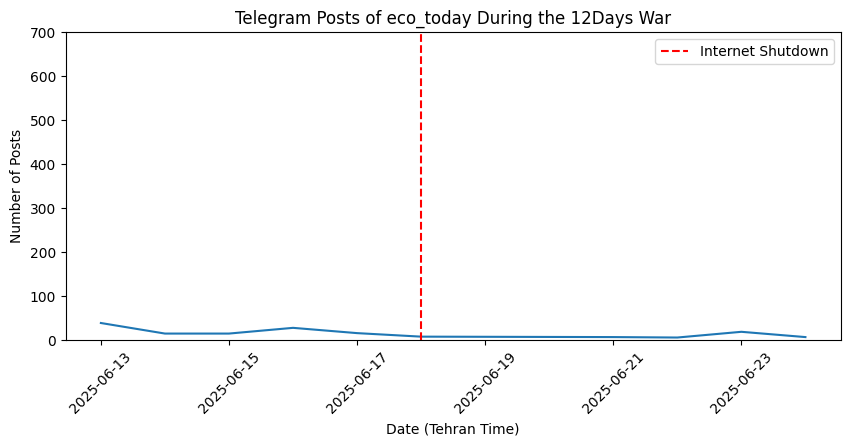

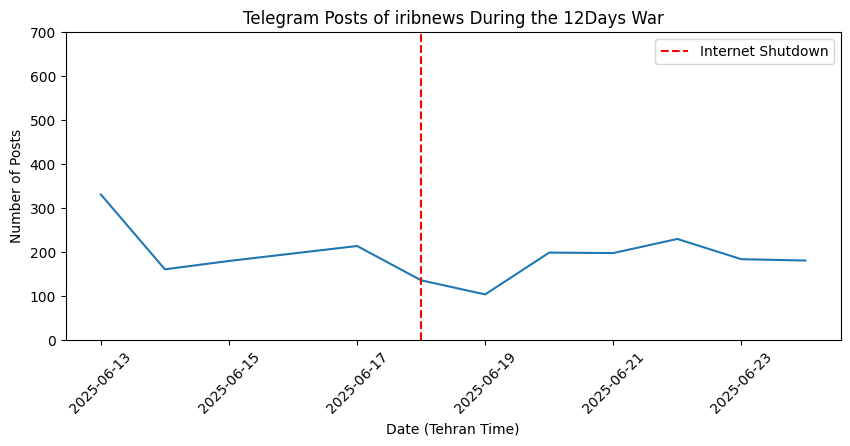

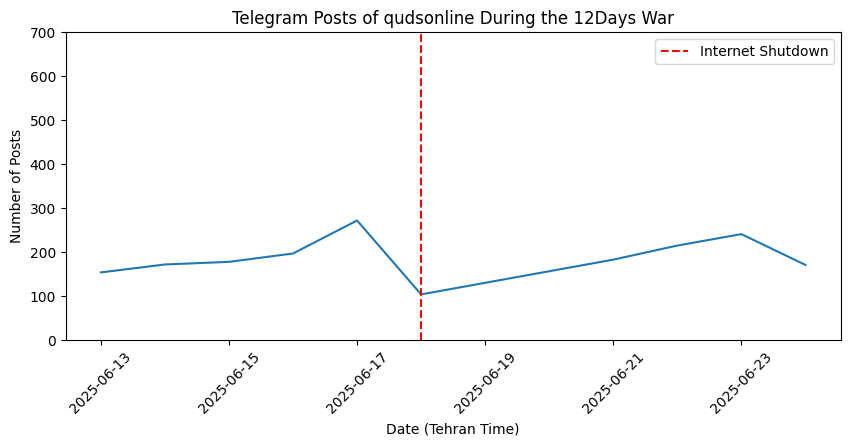

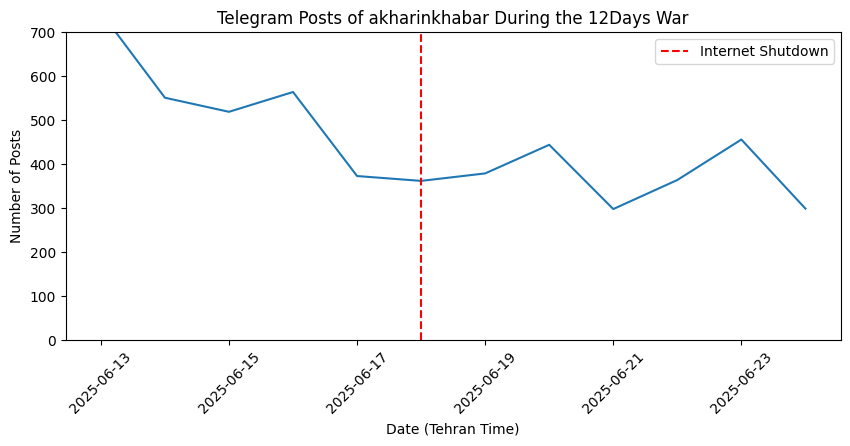

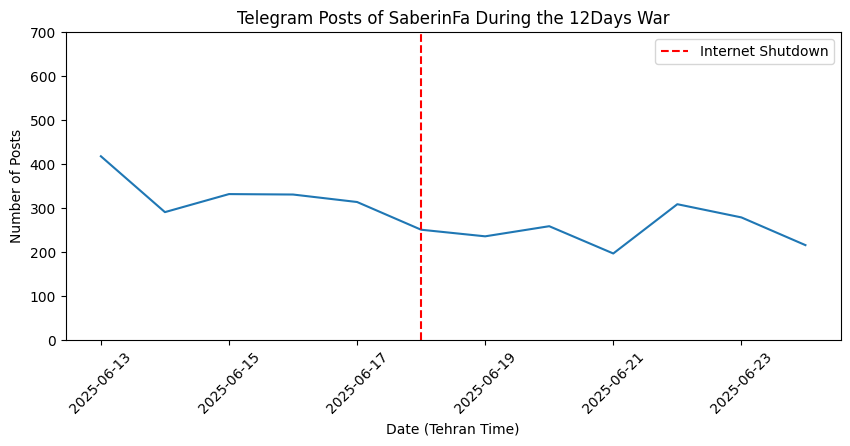

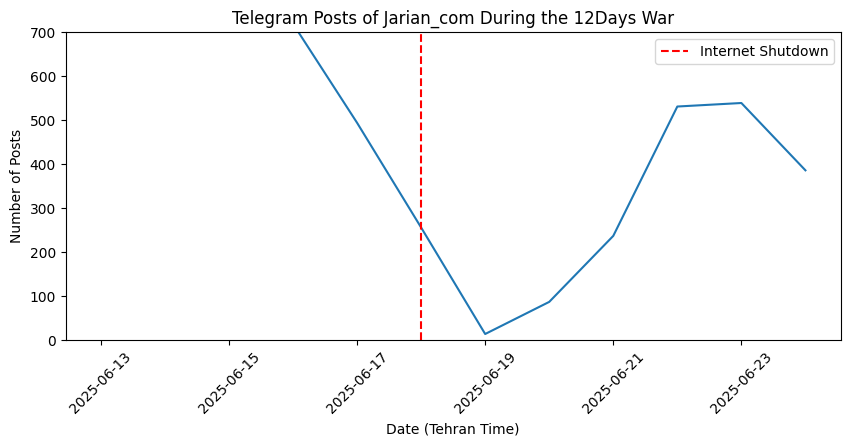

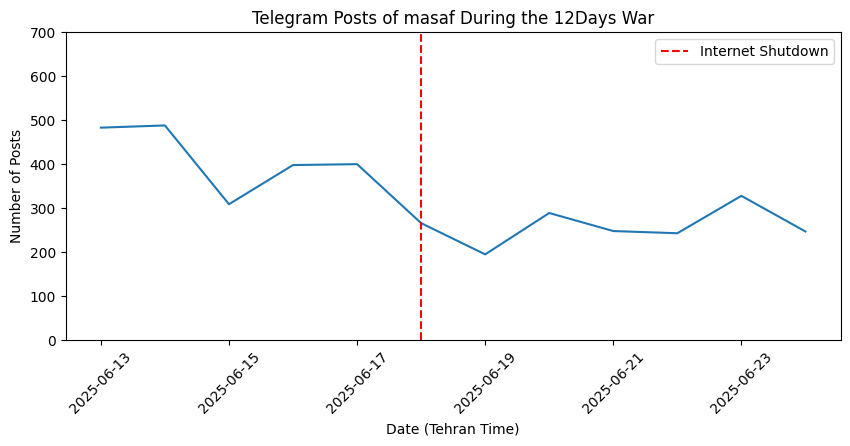

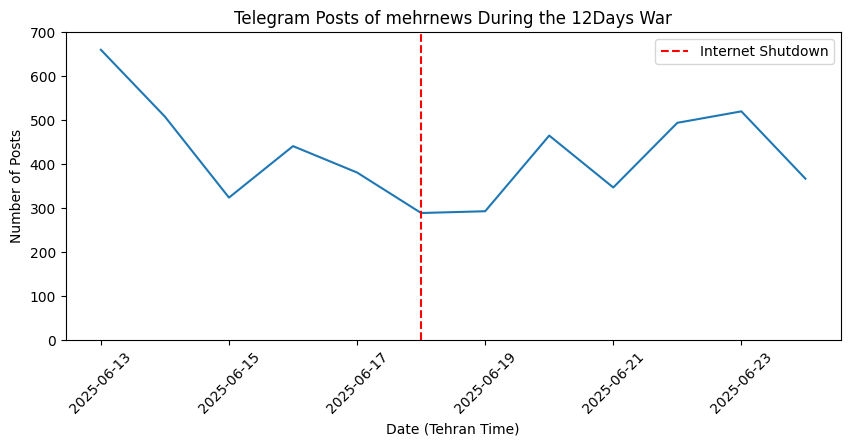

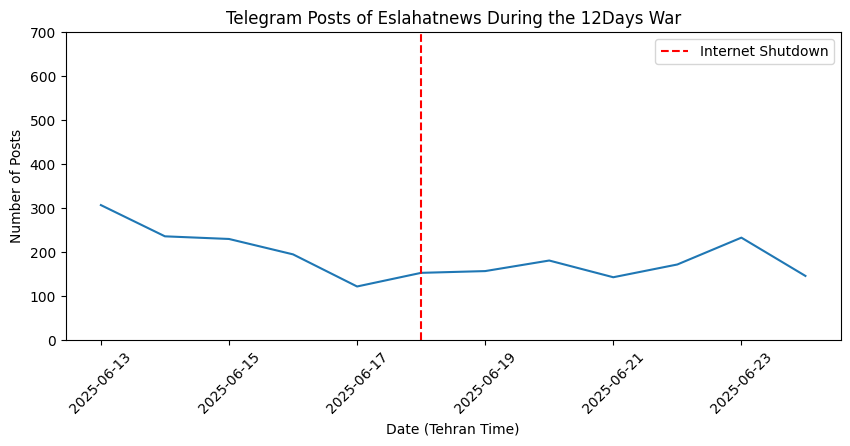

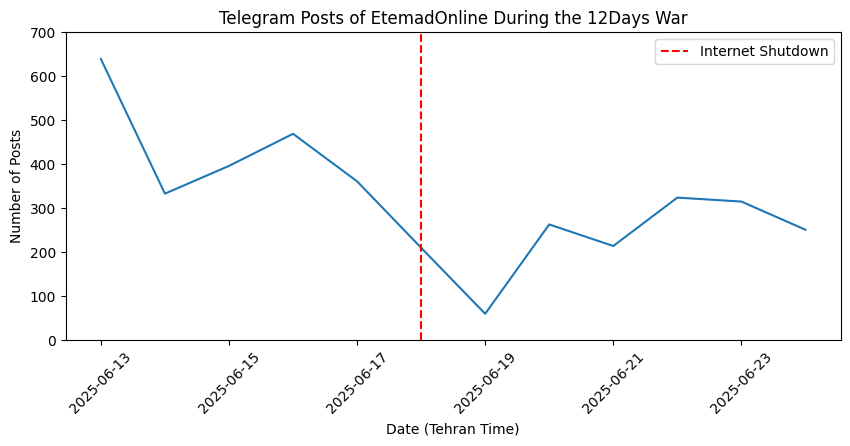

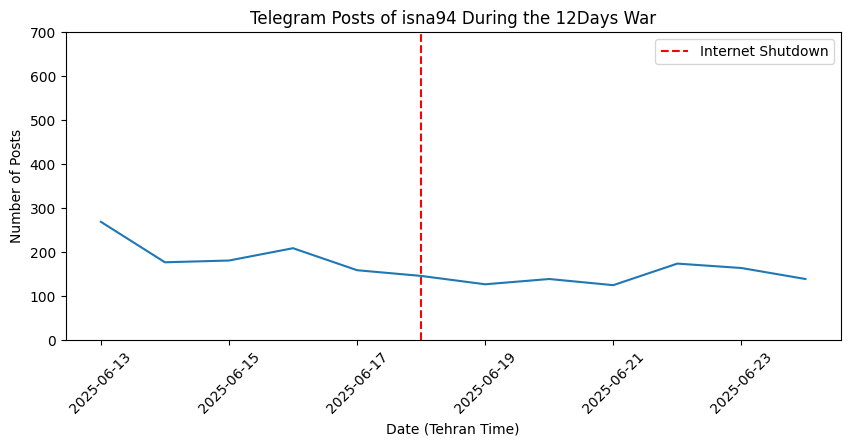

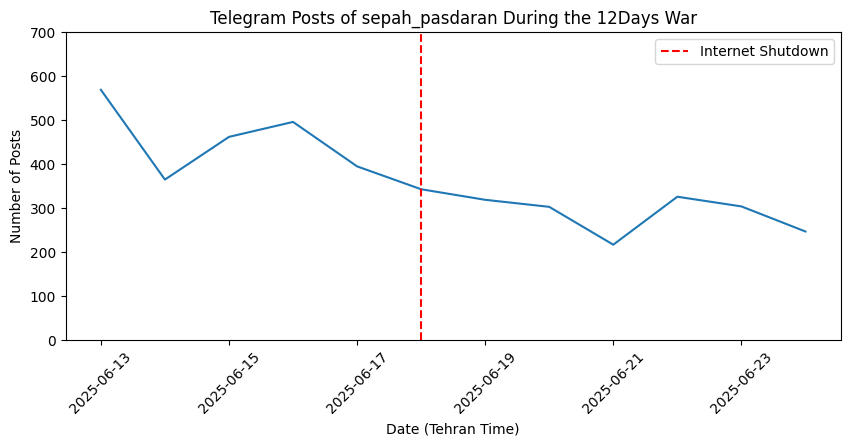

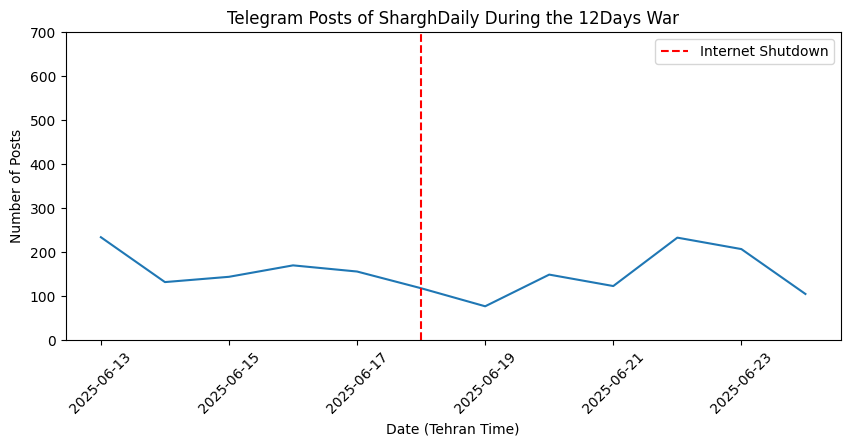

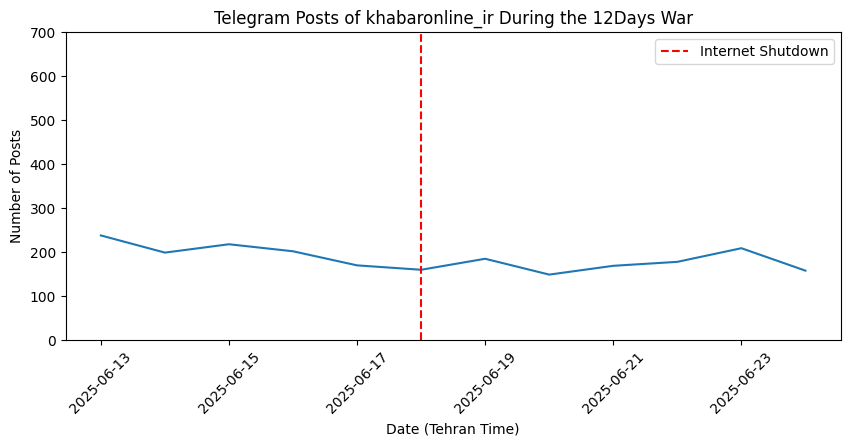

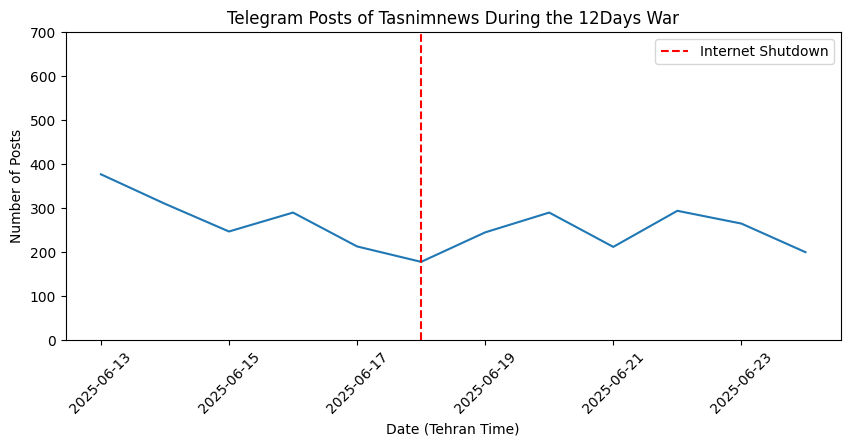

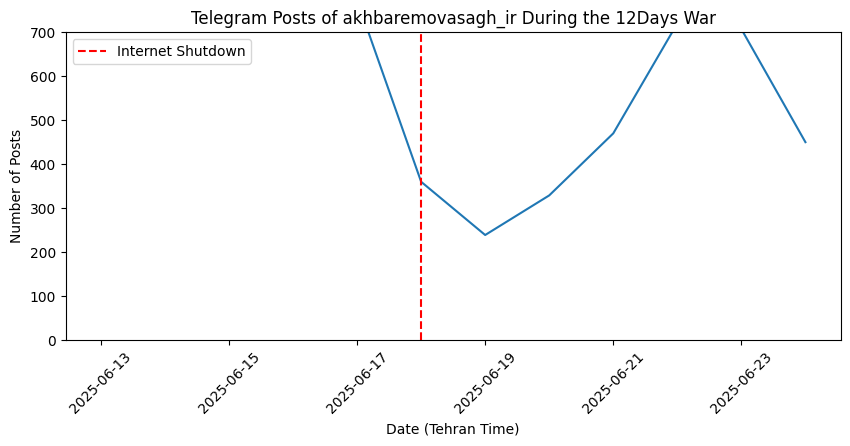

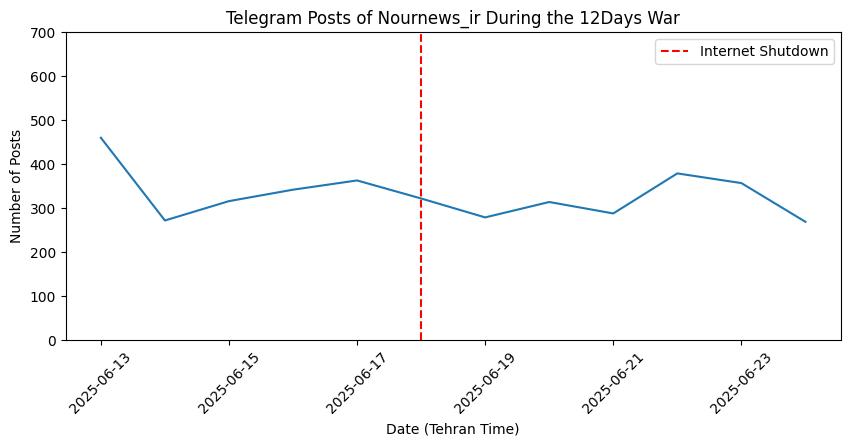

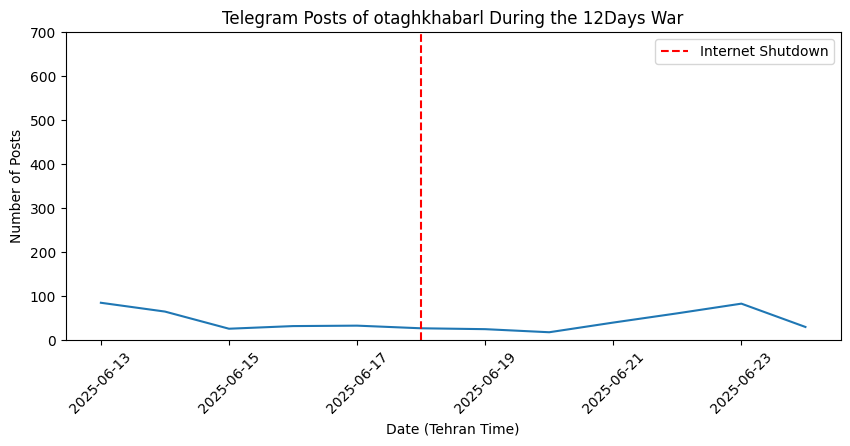

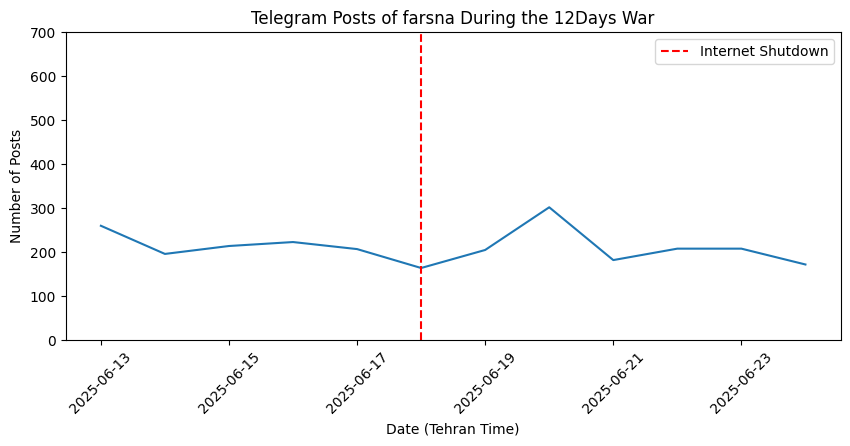

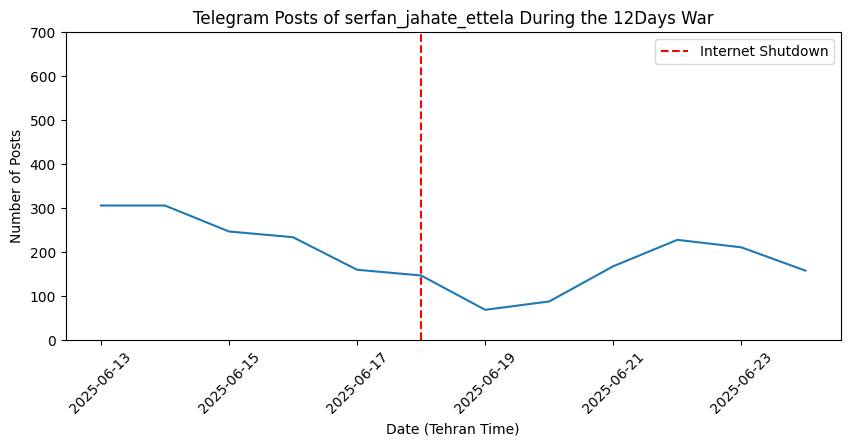

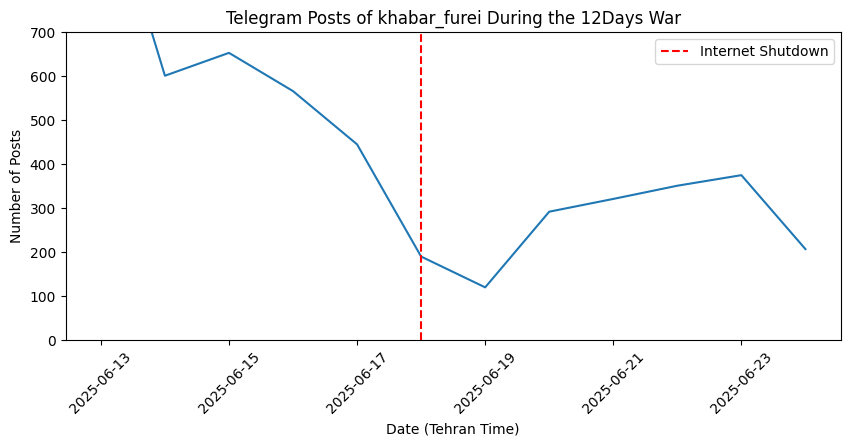

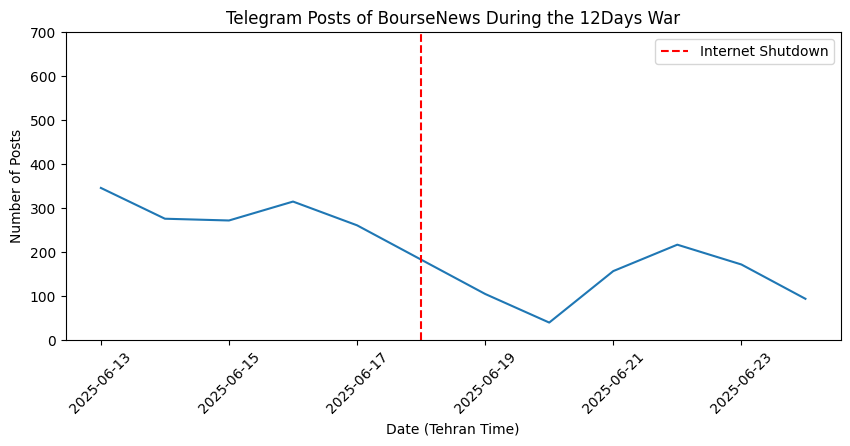

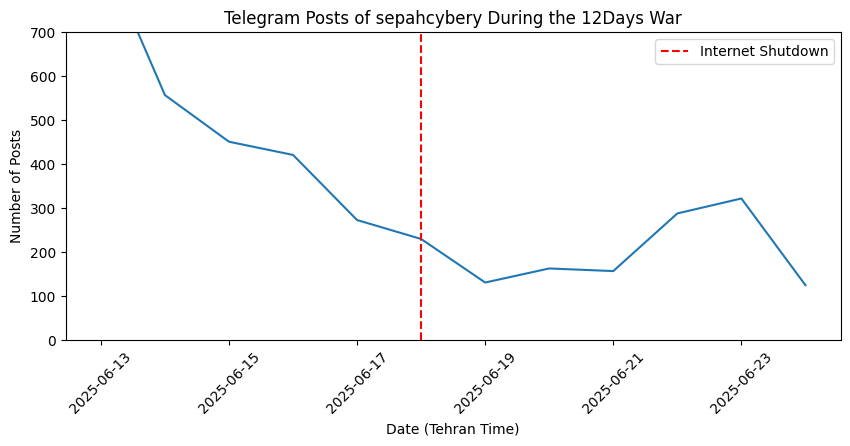

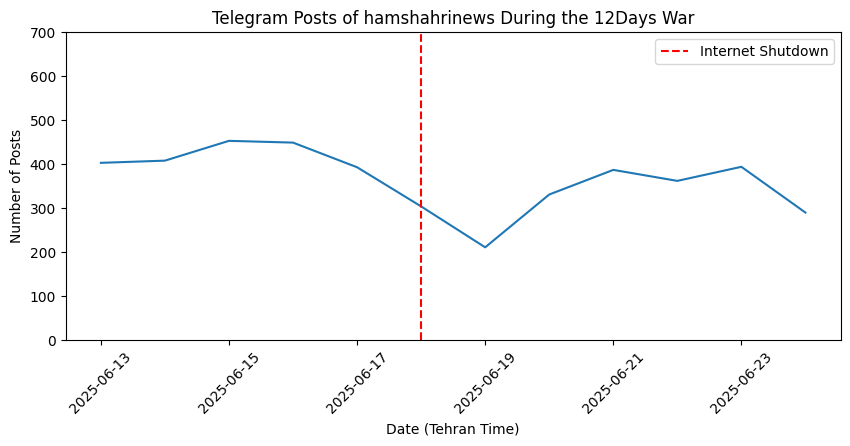

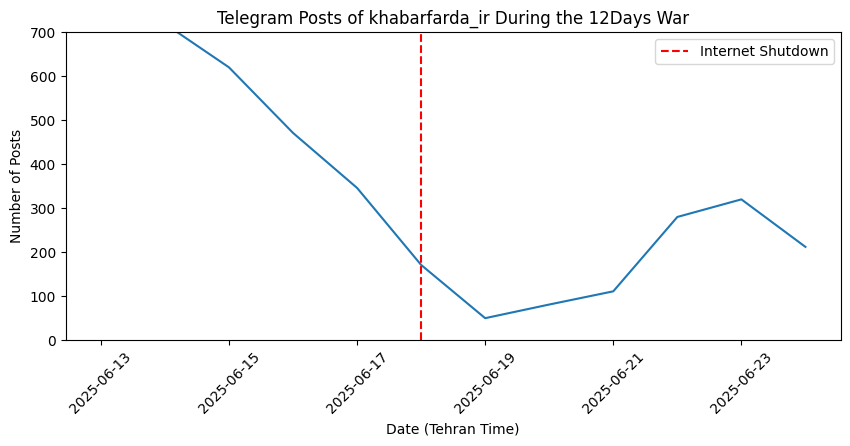

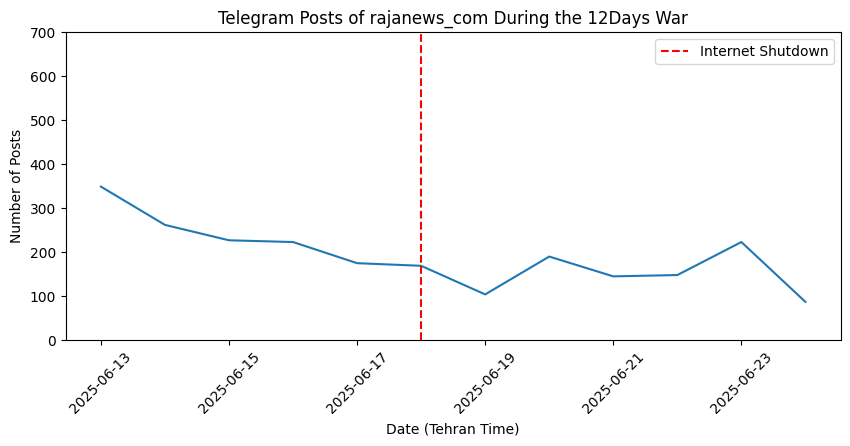

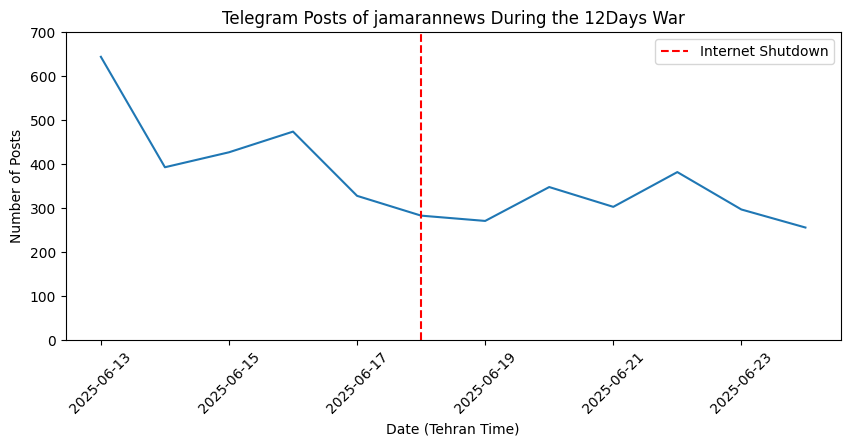

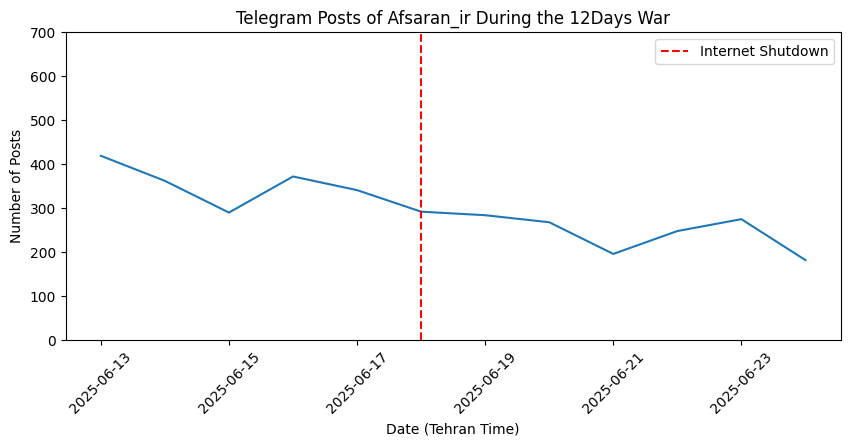

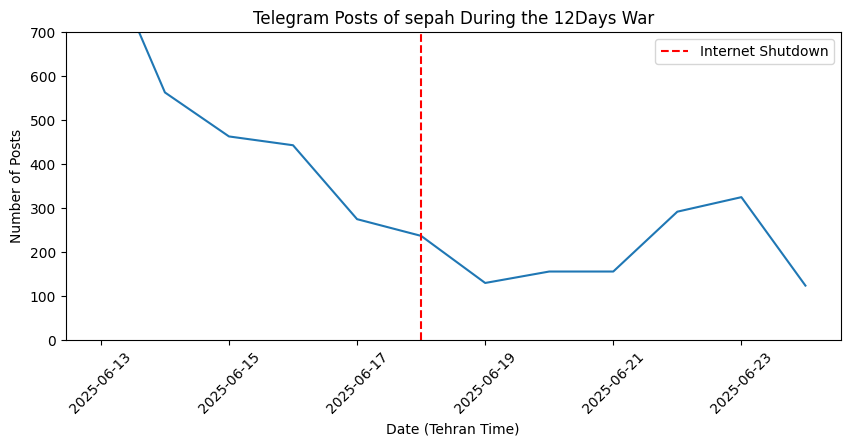

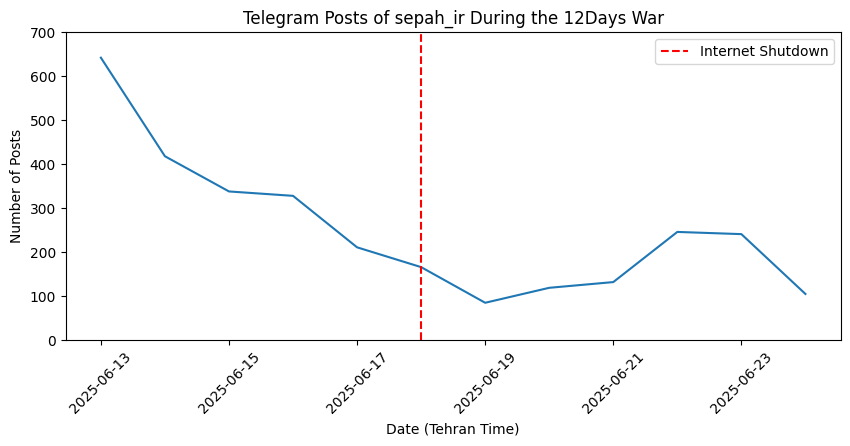

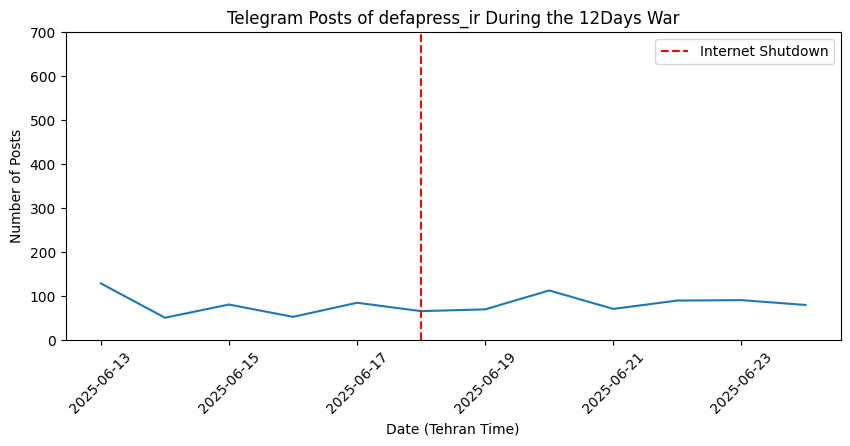

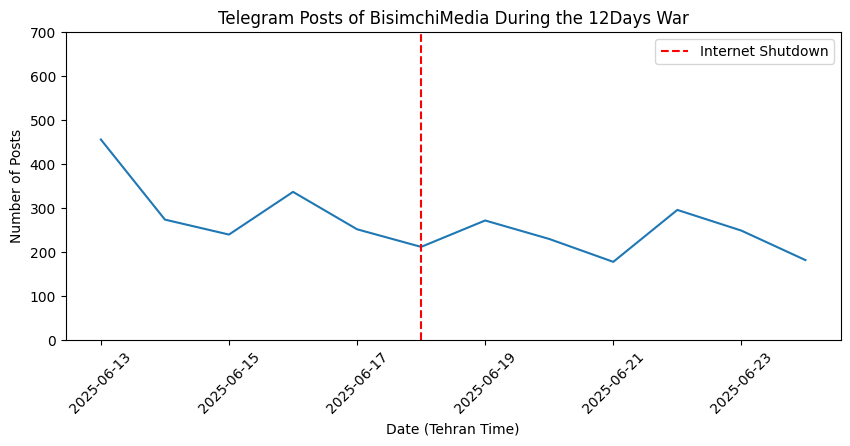

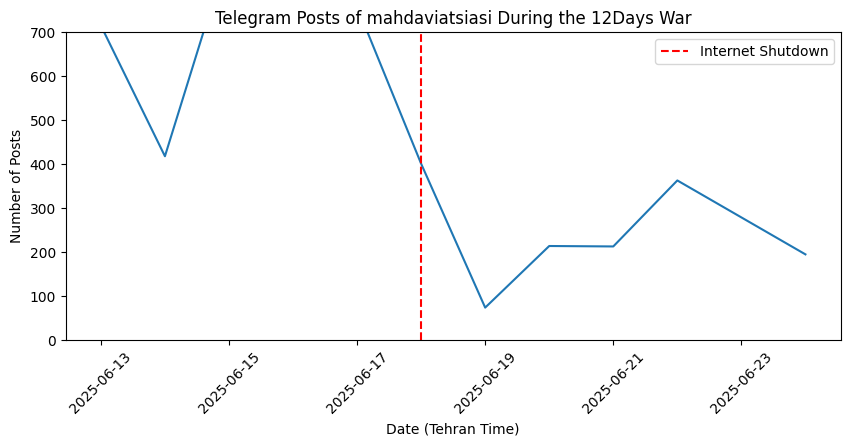

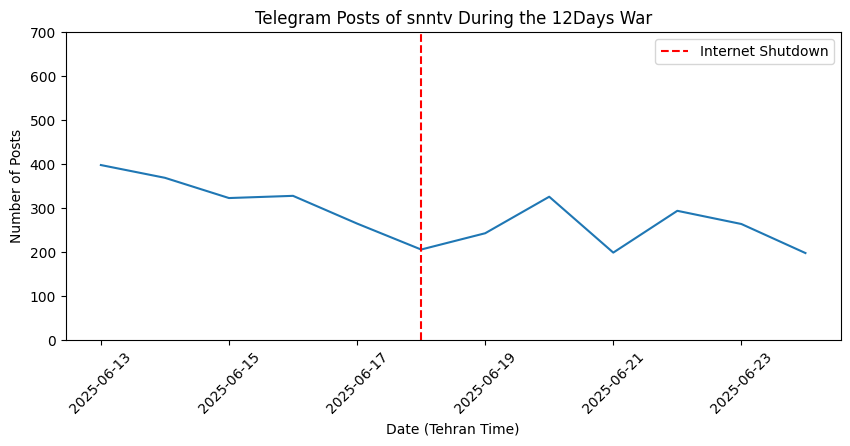

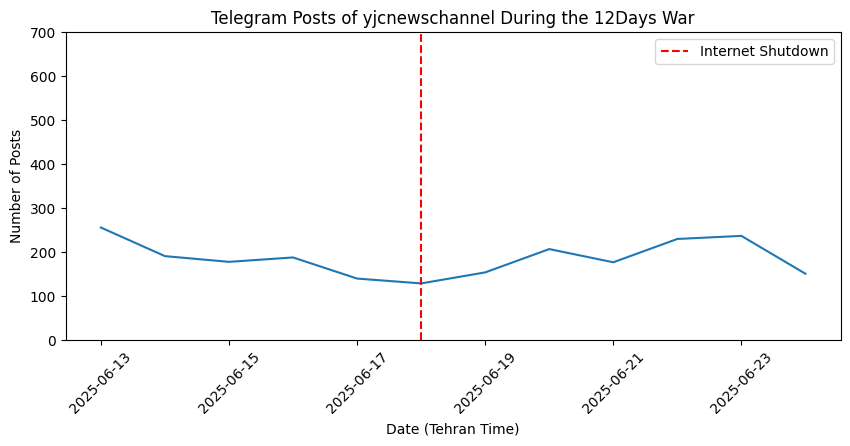

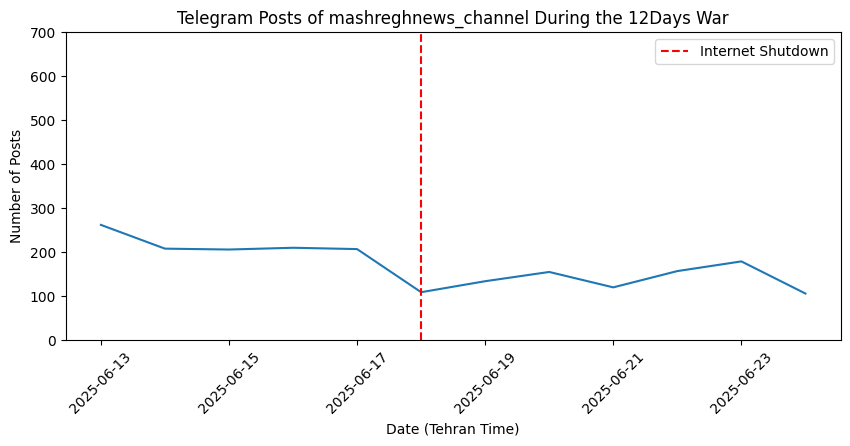

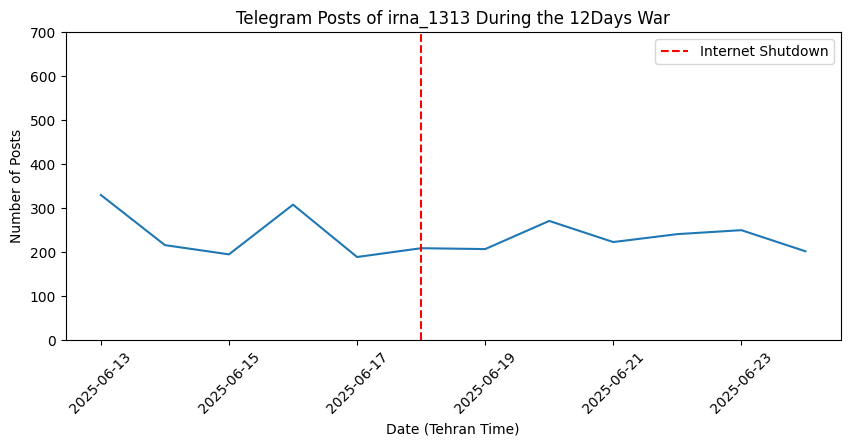

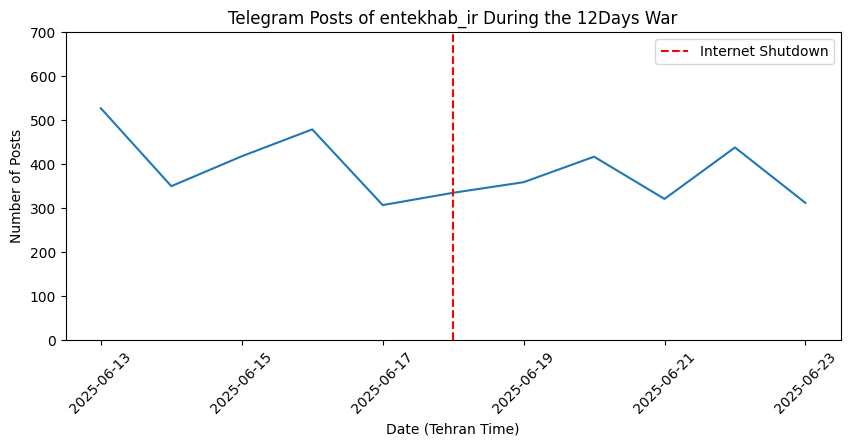

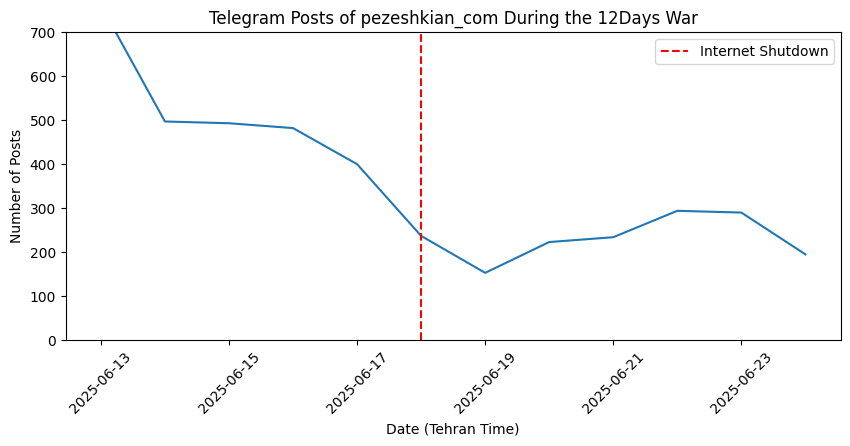

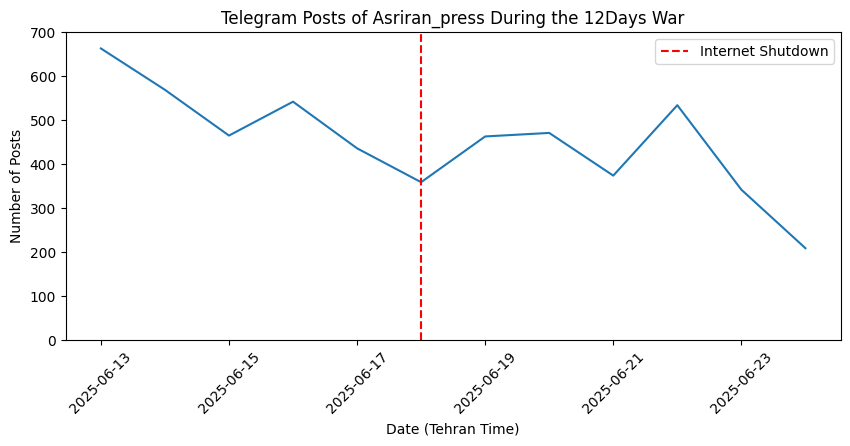

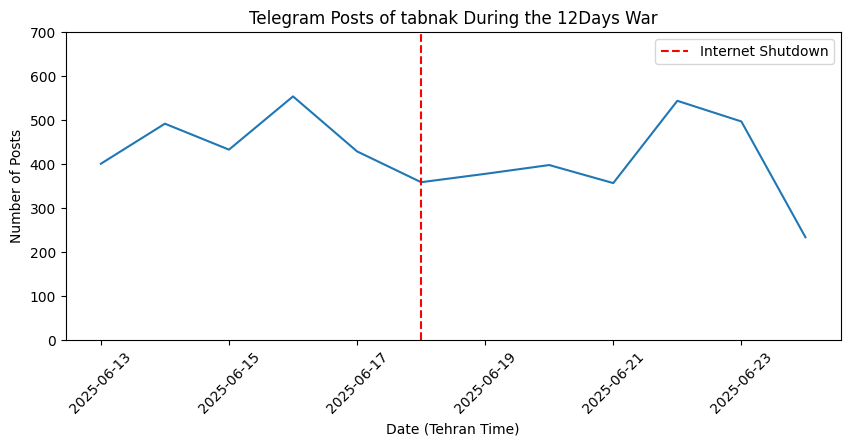

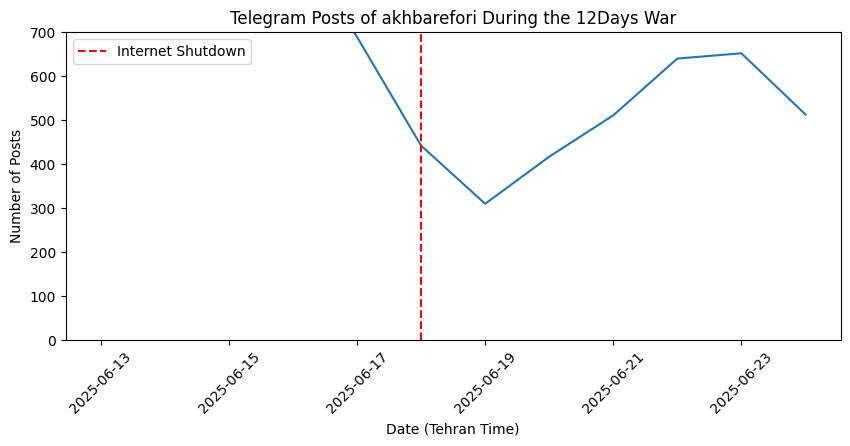

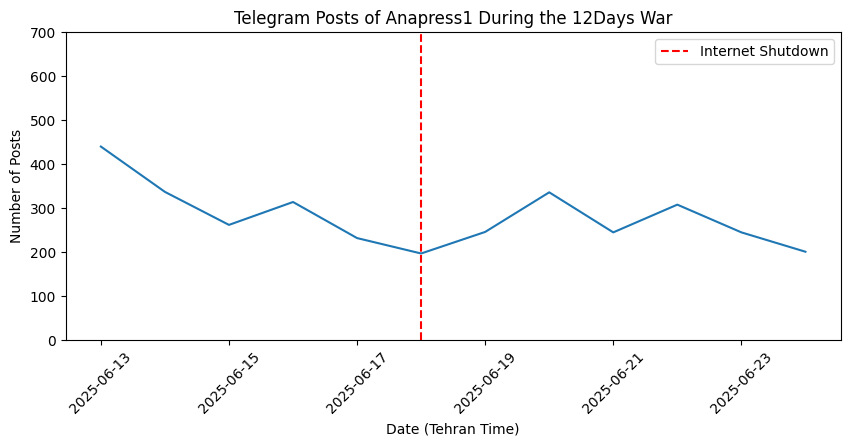

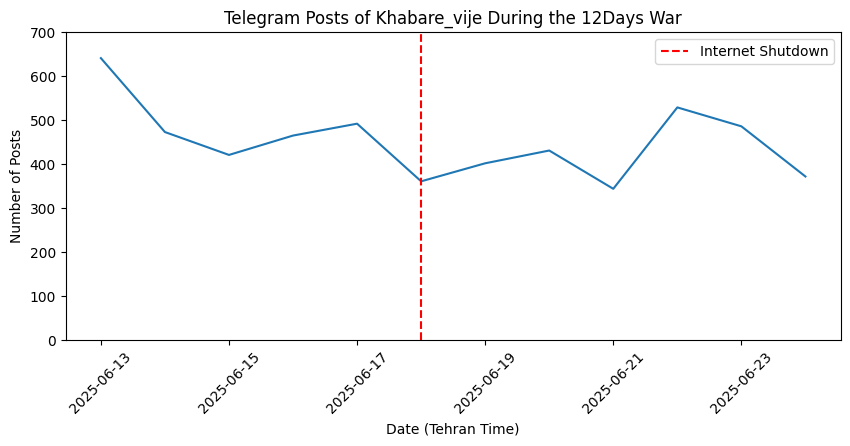

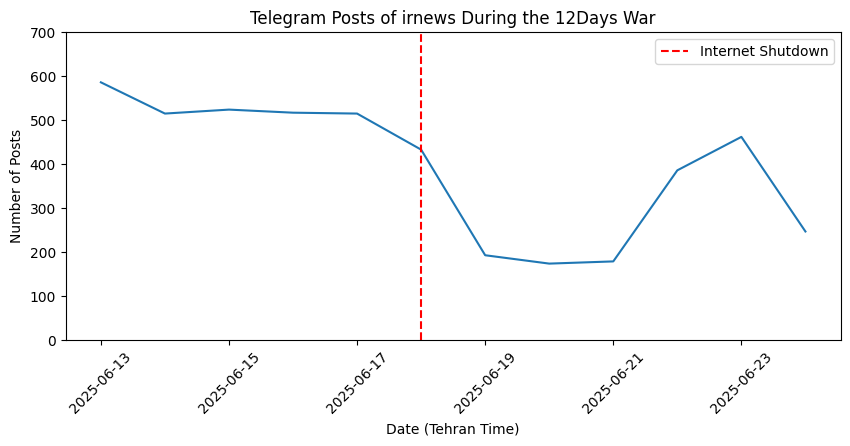

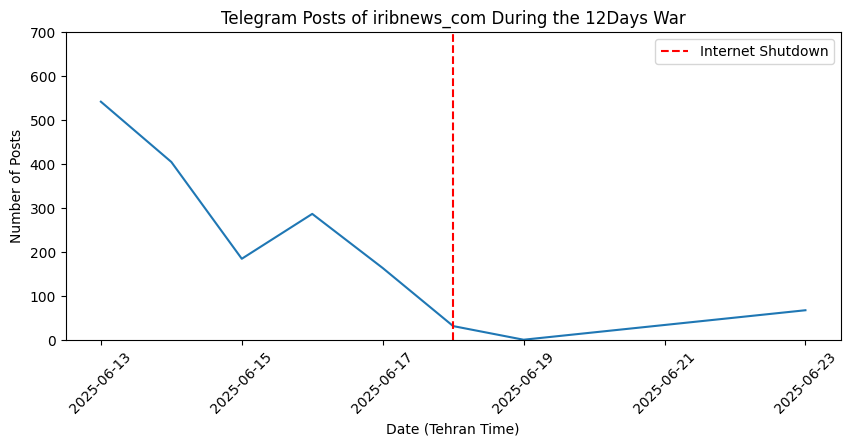

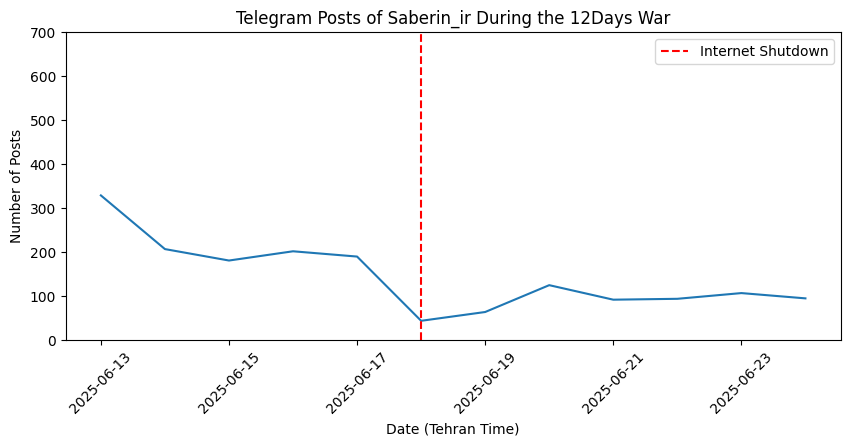

In [70]:
channs_list_w = tg_w['channel'].unique()

tg_w_chann_dayly = tg_w.groupby(['channel', 'day']).size().reset_index(name='count')

for chan in channs_list_w:
  plt.figure(figsize=(10,4))
  sns.lineplot(data=tg_w_chann_dayly[tg_w_chann_dayly['channel'] == chan]
               ,x='day', y='count')
  plt.axvline(x=pd.to_datetime("2025-06-18").date(), color='red',
              linestyle='--', label = 'Internet Shutdown')
  plt.xticks(rotation=45)
  plt.xlabel("Date (Tehran Time)")
  plt.ylabel("Number of Posts")
  plt.title(f"Telegram Posts of {chan} During the 12Days War")
  plt.ylim(0, 700)
  plt.legend()
  plt.show()
